# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

# Описание проекта

Заказчик этого исследования — сеть отелей «Как в гостях».
Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента.
Чтобы решить эту проблему, вам нужно разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

# Бизнес-метрика и другие данные

Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца.
В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня.

**Стоимость номеров отеля:**
* категория A: за ночь — 1 000, разовое обслуживание — 400;
* категория B: за ночь — 800, разовое обслуживание — 350;
* категория C: за ночь — 600, разовое обслуживание — 350;
* категория D: за ночь — 550, разовое обслуживание — 150;
* категория E: за ночь — 500, разовое обслуживание — 150;
* категория F: за ночь — 450, разовое обслуживание — 150;
* категория G: за ночь — 350, разовое обслуживание — 150.

В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.
Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.
На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

**Инструкция по выполнению**

**Шаг 1. Открыть файлы с данными**
Пути к файлам:
* /datasets/hotel_train.csv — данные для обучения модели.
* /datasets/hotel_test.csv — данные для тестирования модели.

**Шаг 2. Предобработка и исследовательский анализ данных**
* Проверть данные и откорректировать их, если потребуется.
* Провести исследовательский анализ представленных данных. Описать найденные особенности: пропуски, выбросы.

**Шаг 3. Вычислить бизнес-метрику**
* Оценить прибыль отеля без внедрения депозитов.

**Шаг 4. Разработка модели ML**
* Обучить разные модели и оцените их качество кросс-валидацией. Выбрать лучшую модель и проверить её на тестовой выборке. Описать выводы.
* Выбрать метрику для обучения.
* Оценить прибыль, которую принесёт выбранная модель за год.

**Шаг 5. Выявить признаки «ненадёжного» клиента**
* На основе исследовательского анализа данных опиисать клиента, склонного к отказу от брони.

**Шаг 6. Написать общий вывод**
* Описать модель, которая решает задачу с наибольшей выгодой для бизнеса. Дайть бизнесу рекомендации по результатам проделанной работы.

**Описание данных** 

В таблицах hotel_train и hotel_test содержатся одинаковые столбцы:
* id — номер записи;
* adults — количество взрослых постояльцев;
* arrival_date_year — год заезда;
* arrival_date_month — месяц заезда;
* arrival_date_week_number — неделя заезда;
* arrival_date_day_of_month — день заезда;
* babies — количество младенцев;
* booking_changes — количество изменений параметров заказа;
* children — количество детей от 3 до 14 лет;
* country — гражданство постояльца;
* customer_type — тип заказчика:
  * Contract — договор с юридическим лицом;
  * Group — групповой заезд;
  * Transient — не связано с договором или групповым заездом;
  * Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.
* days_in_waiting_list — сколько дней заказ ожидал подтверждения;
* distribution_channel — канал дистрибуции заказа;
* is_canceled — отмена заказа;
* is_repeated_guest — признак того, что гость бронирует номер второй раз;
* lead_time — количество дней между датой бронирования и датой прибытия;
* meal — опции заказа:
  * SC — нет дополнительных опций;
  * BB — включён завтрак;
  * HB — включён завтрак и обед;
  * FB — включён завтрак, обед и ужин.
* previous_bookings_not_canceled — количество подтверждённых заказов у клиента;
* previous_cancellations — количество отменённых заказов у клиента;
* required_car_parking_spaces — необходимость места для автомобиля;
* reserved_room_type — тип забронированной комнаты;
* stays_in_weekend_nights — количество ночей в выходные дни;
* stays_in_week_nights — количество ночей в будние дни;
* total_nights — общее количество ночей;
* total_of_special_requests — количество специальных отметок.

### Шаг 1. Откройте файлы с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning) #Скрываем лишние предупреждения

In [2]:
try:
    hotel_train = pd.read_csv('C:\Data\hotel_train.csv')
    hotel_test = pd.read_csv('C:\Data\hotel_test.csv')
except:
    hotel_train = pd.read_csv('/datasets/hotel_train.csv')
    hotel_test = pd.read_csv('/datasets/hotel_test.csv')

In [3]:
hotel_train.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3


In [4]:
hotel_test.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7


**Вывод по Шагу 1.**

Мы открыли файл с данными.

### Шаг 2. Предобработка и исследовательский анализ данных

In [5]:
hotel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [6]:
hotel_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

In [7]:
hotel_train.duplicated().sum()

0

In [8]:
hotel_test.duplicated().sum()

0

**Явных дубликатов нет**

**Провеим данные на дубликаты, содержащие категориальные пееменные. Начнём со столбца `meal`. Он должен содержать 4 уникальных значения: SC, BB, HB, FB.**

In [9]:
hotel_train['meal'].unique()

array(['BB       ', 'FB       ', 'HB       ', 'SC       ', 'SC'],
      dtype=object)

In [10]:
hotel_test['meal'].unique()

array(['BB       ', 'HB       ', 'SC', 'FB       ', 'SC       '],
      dtype=object)

Столбцы содержат неявные дубликаты 'SC       ' и 'SC'. Причина появления - лишние пробелы. Избавимся от них с помощью метода `strip`.

In [11]:
hotel_train['meal'] = hotel_train['meal'].str.strip()

In [12]:
hotel_test['meal'] = hotel_test['meal'].str.strip()

**Убедимся, что нет неявных дубликатов.**

In [13]:
hotel_train['meal'].value_counts()

BB    51697
HB     7292
SC     5789
FB      451
Name: meal, dtype: int64

In [14]:
hotel_test['meal'].value_counts()

BB    24684
SC     5293
HB     2399
FB       36
Name: meal, dtype: int64

**Выведем уникальные значения для столбца `reserved_room_type`**

In [15]:
hotel_train['reserved_room_type'].unique()

array(['A               ', 'C               ', 'D               ',
       'E               ', 'G               ', 'F               ',
       'B               '], dtype=object)

In [16]:
hotel_test['reserved_room_type'].unique()

array(['A               ', 'E               ', 'G               ',
       'D               ', 'F               ', 'C               ',
       'B               '], dtype=object)

**Уберём пробелы с помощью метода strip**

In [17]:
hotel_train['reserved_room_type'] = hotel_train['reserved_room_type'].str.strip()

In [18]:
hotel_test['reserved_room_type'] = hotel_test['reserved_room_type'].str.strip()

In [19]:
hotel_train['reserved_room_type'].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'B'], dtype=object)

In [20]:
hotel_test['reserved_room_type'].unique()

array(['A', 'E', 'G', 'D', 'F', 'C', 'B'], dtype=object)

**Приведём данные к нужным типам. Переведём столбцы `lead_time`, `adults`, `children`, `babies` к целочисленному типу, поскольку они содержат информацию о целочисленных типах.**

In [21]:
columns = ['lead_time', 'adults', 'children', 'babies']
tables = [hotel_train, hotel_test]
for table in tables:
    for col in columns:
        table[col] = table[col].astype('int64')

In [22]:
hotel_train.info()
print()
hotel_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              65229 non-null  int64 
 1   is_canceled                     65229 non-null  int64 
 2   lead_time                       65229 non-null  int64 
 3   arrival_date_year               65229 non-null  int64 
 4   arrival_date_month              65229 non-null  object
 5   arrival_date_week_number        65229 non-null  int64 
 6   arrival_date_day_of_month       65229 non-null  int64 
 7   stays_in_weekend_nights         65229 non-null  int64 
 8   stays_in_week_nights            65229 non-null  int64 
 9   adults                          65229 non-null  int64 
 10  children                        65229 non-null  int64 
 11  babies                          65229 non-null  int64 
 12  meal                            65229 non-null

**Тип данных сменили**

# Работа с выбросами

Рассмотрим столбцы, содержащие количественные переменные методом describe()

In [23]:
hotel_train.describe()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000
mean,43544.069172,0.368609,96.337917,2015.719021,31.339772,15.847813,0.825185,2.224793,1.836576,0.074890,0.007236,0.027151,0.128915,0.107713,0.194269,3.334422,0.056647,0.512763,3.049978
std,25614.858971,0.482431,96.127545,0.449481,13.464024,8.748182,0.853477,1.354992,0.480245,0.334243,0.098790,0.162523,0.965326,1.326638,0.593838,18.239606,0.232094,0.752590,1.738108
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19108.000000,0.000000,17.000000,2015.000000,21.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,40554.000000,0.000000,64.000000,2016.000000,34.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,67414.000000,1.000000,151.000000,2016.000000,42.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,84121.000000,1.000000,374.000000,2016.000000,53.000000,31.000000,4.000000,6.000000,4.000000,3.000000,10.000000,1.000000,26.000000,58.000000,17.000000,259.000000,3.000000,5.000000,10.000000


In [24]:
hotel_test.describe()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,32412.000000,32412.000000,32412.000000,32412.0,32412.000000,32412.000000,32412.000000,32412.00000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000
mean,60131.505183,0.388467,97.587869,2017.0,17.804054,15.656948,0.867888,2.34009,1.858602,0.083765,0.005523,0.031377,0.011601,0.171418,0.216741,0.262341,0.046248,0.657781,3.207979
std,29953.586177,0.487409,86.507146,0.0,9.177384,8.766429,0.853394,1.37517,0.489341,0.343470,0.075757,0.174338,0.180473,1.875170,0.640551,4.733027,0.219367,0.834341,1.738683
min,6086.000000,0.000000,0.000000,2017.0,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,45291.750000,0.000000,23.000000,2017.0,10.000000,8.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,53394.500000,0.000000,76.000000,2017.0,18.000000,15.500000,1.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,89800.250000,1.000000,155.000000,2017.0,25.000000,23.000000,2.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,97903.000000,1.000000,373.000000,2017.0,35.000000,31.000000,4.000000,6.00000,4.000000,3.000000,2.000000,1.000000,6.000000,72.000000,18.000000,223.000000,8.000000,5.000000,10.000000


По пиведённым выше таблицам возможны выбросы. Начнём со столба `lead_time` - количество дней меду датой брониования и прибытием. Медианное значение - 64 дня, верхний квантиль - 155, максимальное значение - 373 дня. Построим диаграмму размаа, чтобы понимать, какие значения считать выбросами.

<AxesSubplot:title={'center':'Размах количества дней между бонированием и прибытием в тренировочной выборке'}>

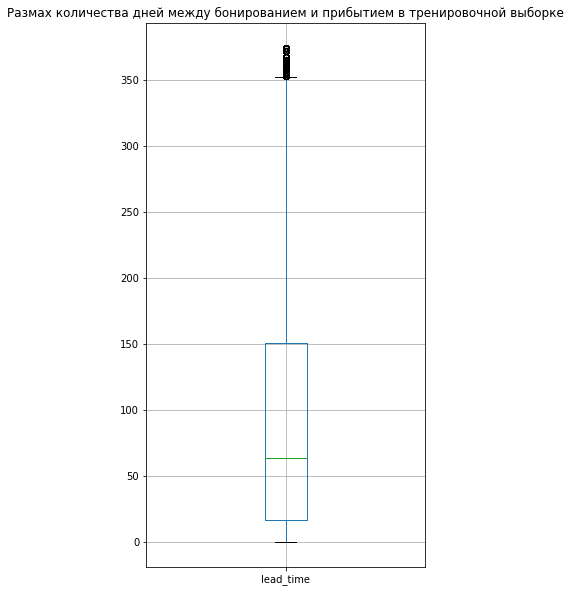

In [25]:
hotel_train['lead_time'].plot(kind='box', figsize=(5,10), grid=True, legend=True, title='Размах количества дней между бонированием и прибытием в тренировочной выборке')

**Из диаграммы видно, что все значения больше 350 - выбросы. Возможн, это техническая ошибка, а возможно, что это величина в часах (что соответстветствуют 15 дням). Скорее всего это маловероятно, что кто-то планирует отпуск за год.**

In [26]:
hotel_train.query('lead_time>350')['lead_time'].count()

567

**Значений больше 350 - 567.**

In [27]:
hotel_train = hotel_train.query('lead_time<350')

**Построим диаграмму для тестовой выборки**

<AxesSubplot:title={'center':'Размах количества дней между бонированием и прибытием в тестовой выбоке'}>

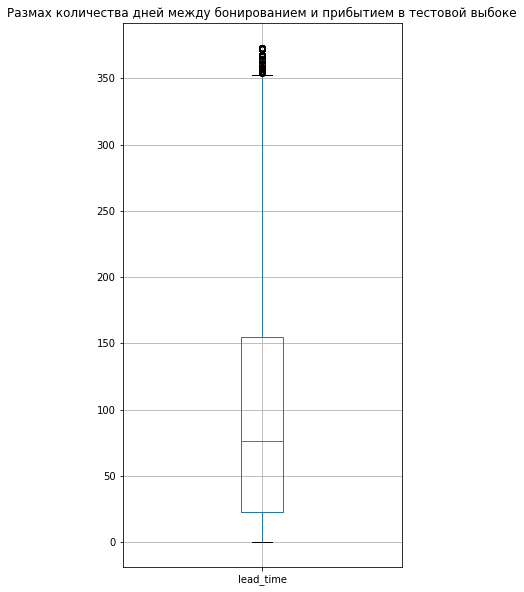

In [28]:
hotel_test['lead_time'].plot(kind='box', figsize=(5,10), grid=True, legend=True, title='Размах количества дней между бонированием и прибытием в тестовой выбоке')

In [29]:
hotel_test.query('lead_time>350')['lead_time'].count()

187

**Здесь мы также видим 187 выбросов. Удалим из выборки значения, которые больше 350**

In [30]:
hotel_test = hotel_test.query('lead_time<350')

**Изучим столбец `adults`. У нас имеются нулевые значения в тренировочной и тестовой выборках, чего быть не может. Возможно были перепутаны столбцы `adults` и `children` и/или `babies`. Удалим эти значения.**

In [31]:
hotel_train = hotel_train.query('adults!=0')
hotel_test = hotel_test.query('adults!=0')

**Рассмотрим столбец `babies`.**

In [32]:
hotel_train['babies'].value_counts()

0     63975
1       443
2         3
9         1
10        1
Name: babies, dtype: int64

In [33]:
hotel_test['babies'].value_counts()

0    31965
1      169
2        4
Name: babies, dtype: int64

**Значения в тренировочной выборке, где 9 и 10, скорее всего, выбросы, либо ошибки, поскольку их, скорее всего, ошибочно ввлеи. Удалим их.**

In [34]:
hotel_train = hotel_train.query('babies<9')

**Рассмотрим столбец `required_car_parking_spaces` - числу требуемых парковочных мест**

In [35]:
display(hotel_train['required_car_parking_spaces'].value_counts())
print()
display(hotel_test['required_car_parking_spaces'].value_counts())

0    60754
1     3655
2       11
3        1
Name: required_car_parking_spaces, dtype: int64

0    30664
1     1465
2        6
8        2
3        1
Name: required_car_parking_spaces, dtype: int64

**Как мы видим, 2, 3, 8 - выбросы, псокольку данных значений мало, поэтому удалим их.**

In [36]:
hotel_train = hotel_train.query('required_car_parking_spaces<2')
hotel_test = hotel_test.query('required_car_parking_spaces<2')

**Перейдём к рассмотру столбца `booking_changes` - количество изменений параметров заказа. Из параметра `describe` видно, что в `hotel_train` и `hotel_test` максимальное количество изменений - 17 и 18. При этом, медианное значение в обоих столбцах равно нулю, граница тертьего квантиля также равна нулю. Построим гисторграммы по количеству частот изменений параметров заказа**

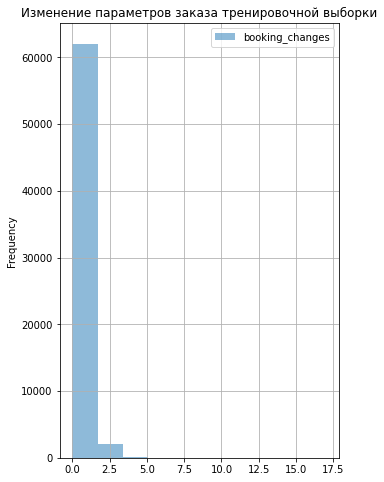

<AxesSubplot:title={'center':'Изменение параметров заказа тестовой выборки'}, ylabel='Frequency'>

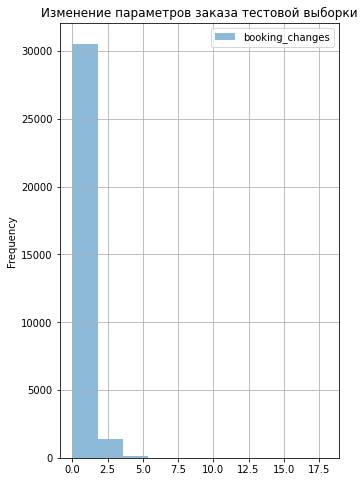

In [37]:
hotel_train['booking_changes'].plot(kind='hist', figsize=(5,8), alpha=0.5, grid=True, legend=True, title='Изменение параметров заказа тренировочной выборки')
plt.show()
hotel_test['booking_changes'].plot(kind='hist', figsize=(5,8), alpha=0.5, grid=True, legend=True, title='Изменение параметров заказа тестовой выборки')

**Все значения больше 5 будем считать выбросами. Удалим их**

In [38]:
hotel_train = hotel_train.query('booking_changes<6')
hotel_test = hotel_test.query('booking_changes<6')

**Рассмотрим столбец `days_in_waiting_list` - сколько дней заказ ожидал подтверждения. Медианные значения и граница третьего квартиля равны нулю. Максимальные значения в тренировочной и тестовой выборках равны 259 и 223. Построим гистограммы распределния**

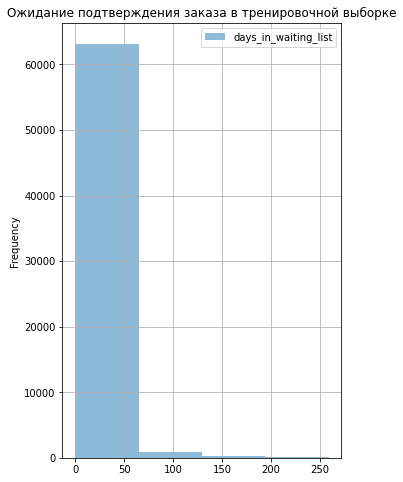

<AxesSubplot:title={'center':'Ожидание подтверждения заказа в тестовой выборке'}, ylabel='Frequency'>

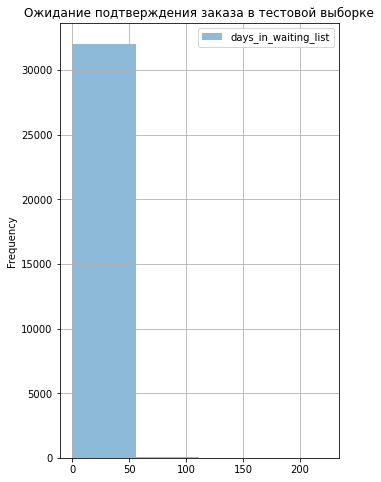

In [39]:
hotel_train['days_in_waiting_list'].plot(kind='hist', bins=4, figsize=(5,8), alpha=0.5, grid=True, legend=True, title='Ожидание подтверждения заказа в тренировочной выборке')
plt.show()
hotel_test['days_in_waiting_list'].plot(kind='hist', bins=4, figsize=(5,8), alpha=0.5, grid=True, legend=True, title='Ожидание подтверждения заказа в тестовой выборке')

**Мы видим аномальные значения, которые больше 50 в обеих выборках. Удалим их.**

In [40]:
hotel_test = hotel_test.query('days_in_waiting_list<51')
hotel_train = hotel_train.query('days_in_waiting_list<51')

In [41]:
print(hotel_train.shape[0])
print(hotel_test.shape[0])

62723
32036


**Число значений в тенировочной выорке сократилось на 2506 и на 376 в тестовой.**

**Изучим в рамках исследовательского анализа взаимосвязь признаков. Построим матрицу корреляций.**

<AxesSubplot:>

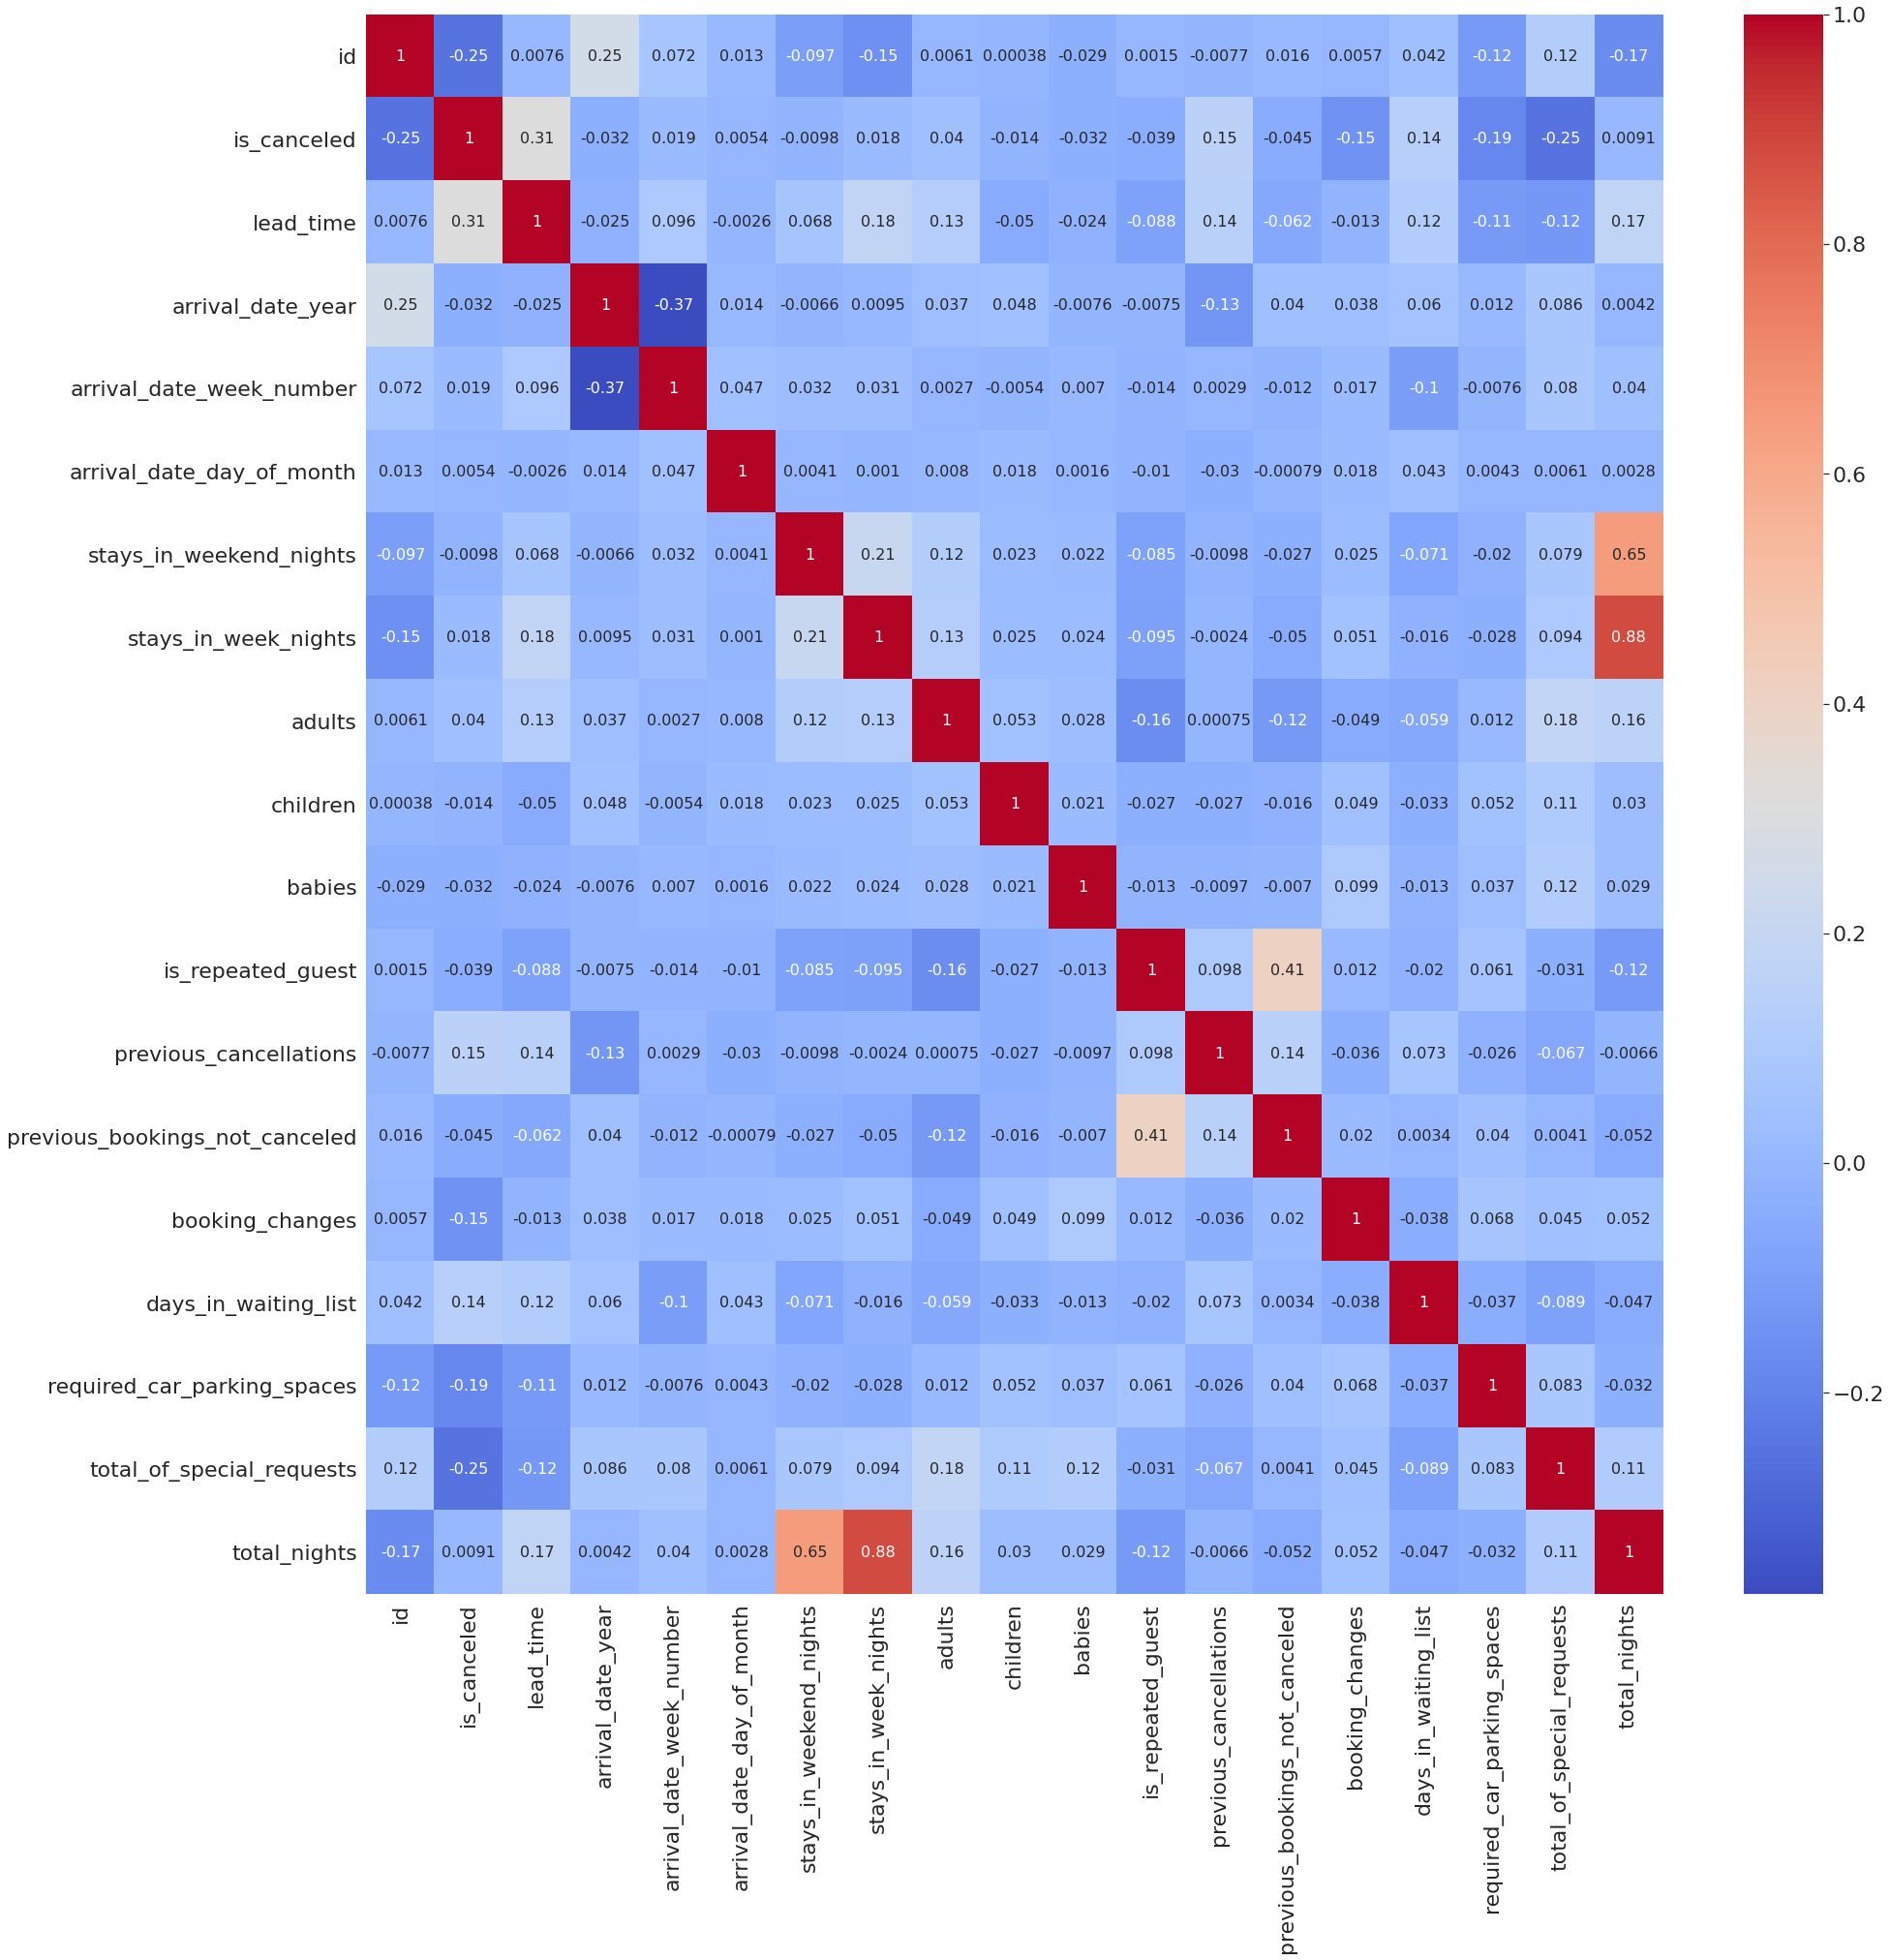

In [42]:
plt.figure(figsize=(30, 30))
sns.set(font_scale=2)
sns.heatmap(hotel_train.corr(), annot = True, fmt='.2g', cmap='coolwarm', annot_kws={"fontsize":16})

**Наиболее сильная взаимосвязь наблюдается у столбцов `stays_in_weeekend_nights` и `total_nights` - 0,65  и `stays_in_week_nights` и `total_nights`. Для корректного обучения модели, мы не будем включать эти взаимосвязанные признаки.**

**Вывод по Шагу 2.**

Во второй части исследования мы провели предоработку и исследовательский анализ данных:
* Убрали пробелы, чтобы измежать неявных дубликатов
* убрали выбросы в столбцах `adults`, `babies`, `lead_time`, `required_car_parking_spaces`, `days_in_waiting_list`
* Выявили сильную взаимосвязь между признаками `stays_in_weeekend_nights` и `total_nights` - 0,65 и `stays_in_week_nights` и `total_nights`.

In [43]:
def string_stripper(data,column):
    data[column] = data[column].str.strip()

In [44]:
object_to_strip = ['reserved_room_type','meal']

In [45]:
string_stripper(hotel_train,'reserved_room_type')

In [46]:
hotel_train['reserved_room_type'].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'B'], dtype=object)

In [47]:
string_stripper(hotel_train,'meal')

In [48]:
hotel_train['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [49]:
string_stripper(hotel_test,'reserved_room_type')

In [50]:
hotel_test['reserved_room_type'].unique()

array(['A', 'E', 'G', 'D', 'F', 'C', 'B'], dtype=object)

In [51]:
string_stripper(hotel_test,'meal')

In [52]:
hotel_test['meal'].unique()

array(['BB', 'HB', 'SC', 'FB'], dtype=object)

In [53]:
hotel_test[hotel_test['required_car_parking_spaces'] > 1]

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights


### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

**В описании задания даны цен за обслуживание и проживание в комнатах категорий: A, B, C, D, E, F, G. Создадим таблицу, в которой будут содержаться данные о стоимость одной комнаты и стоимость разового обслуживания**

In [54]:
columns = ['reserved_room_type' , 'room_price', 'room_prepare']
data = [['A', 1000, 400],['B', 800, 350], ['C', 600, 350], ['D', 550, 150], 
        ['E', 500, 150], ['F', 450, 150], ['G', 350, 150]]
room_data = pd.DataFrame(data=data, columns = columns)

**Выведим таблицу на экран, чтобы проверить, корректна ли она.**

In [55]:
room_data.head(7)

,reserved_room_type,room_price,room_prepare
0,A,1000,400
1,B,800,350
2,C,600,350
3,D,550,150
4,E,500,150
5,F,450,150
6,G,350,150


**Создадим функцию которая посчитает прибыль отеля без депозитов**

In [56]:
#summer = ['June', 'July', 'August']
#winter = ['December', 'January', 'February']

#def count_revenue(row):
#    room_type = row['reserved_room_type']
#    month = row['arrival_date_month']
#    week_nights = row['stays_in_week_nights']
#    weekend_nights = row['stays_in_weekend_nights']
#    price = room_data[room_data['reserved_room_type'] == room_type]['room_price'].median()
   
#    prepare_cost = room_data[room_data['reserved_room_type'] == room_type]['room_prepare'].median()
    
#    total_nights = week_nights + weekend_nights
#    if (row['is_canceled'] == 0):
        
#        prepare_nights = 1 + row['total_nights'] //2
        
#        if (month in summer):
#            revenue = 1.4*price*total_nights - prepare_nights*prepare_cost

#        elif (month in winter):
#            revenue = price*total_nights - prepare_nights*prepare_cost

#        else:
#            revenue = 1.2 * price*total_nights - prepare_nights*prepare_cost
#    else:
#        revenue = - prepare_cost
#    return revenue

In [57]:
def value_replace(data,column,dct,check=True):
    if check:
        print('Before replacement the unique values are:')
        print(data[column].unique())
        print('-'*30)
    data[column] = data[column].replace(to_replace=dct)
    if check:
        print('After replacement the unique values are:')
        print(data[column].unique())

In [58]:
months_dct_train = {'January':0,'February':1,'March':2,'April':3,'May':4,'June':5,'July':6,'August':7,'September':8,'October':9,'November':10,'December':11}

In [59]:
value_replace(data=hotel_test,column='arrival_date_month',dct=months_dct_train)

Before replacement the unique values are:
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
------------------------------
After replacement the unique values are:
[0 1 2 3 4 5 6 7]


In [60]:
def add_new_columns(data):
    
    data['norm_room_cost'] = np.where(data['reserved_room_type'] == 'G',350,
                                    np.where(data['reserved_room_type'] == 'F',450,
                                    np.where(data['reserved_room_type'] == 'E',500,
                                    np.where(data['reserved_room_type'] == 'D',550,
                                    np.where(data['reserved_room_type'] == 'C',600,
                                    np.where(data['reserved_room_type'] == 'B',800,1000
                                            )
                                            )
                                            )
                                            )
                                            ))
    data['season_room_cost'] = np.where((((data['arrival_date_month'] >= 2) & (data['arrival_date_month']<=4)) |((data['arrival_date_month'] >=8) & (data['arrival_date_month']<=10))),data['norm_room_cost'] * 1.2,np.where(((data['arrival_date_month'] >=5) &(data['arrival_date_month'] <= 7)),data['norm_room_cost'] * 1.4,data['norm_room_cost']))
    data['number_of_cleaning'] = np.where(data['is_canceled'] != 1,2+(data['total_nights'] // 2),0)
    data['room_service_cost'] = np.where(data['reserved_room_type'] == 'G',150,
                                    np.where(data['reserved_room_type'] == 'F',150,
                                    np.where(data['reserved_room_type'] == 'E',150,
                                    np.where(data['reserved_room_type'] == 'D',150,
                                    np.where(data['reserved_room_type'] == 'C',350,
                                    np.where(data['reserved_room_type'] == 'B',350,400

                                            )
                                            )
                                            )
                                            )))

In [61]:
hotel_test.head().T

,0,1,2,3,4
id,6086,6087,6088,6089,6090
is_canceled,1,1,1,1,1
lead_time,74,62,62,71,172
arrival_date_year,2017,2017,2017,2017,2017
arrival_date_month,0,0,0,0,0
arrival_date_week_number,1,1,1,1,1
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,1,2,2,2,2
stays_in_week_nights,0,2,2,2,5
adults,2,2,2,1,2


**Посчитаем прибыль отеля без депозитов на тестовой выборке**

In [62]:
#total_revenue = hotel_test.apply(count_revenue, axis=1).sum()
#print(total_revenue)

**Вывод по Шагу 3.**

**Прибыль составила 32943580 рублей.**

### Шаг 4. Разработка модели ML

**Для обучения модели нам необходимо выявить целевой признак. Сформируем модель для задачи классификации, определим, будет ли отменена бронь или нет. Целевой признак `is_canceled`.**

В качестве признаков будем использовать столбцы, которые будут влиять на принятие решении по брони, а именно: `adults`, `arrival_date_week_number`, `babies`, `country`, `children`,`customer_type`,`days_in_waiting_list`,`is_repeated_guest`, `lead_time`, `meal`, `previous_bookings_not_canceled`,`previous_cancellations`, `required_car_parking_spaces`, `reserved_room_type`, `stays_in_weekend_nights`,`stays_in_week_nights`, `total_of_special_requests`, `is_canceled`

**Создадим переменные, hotel_train_ohe и hotel_test_ohe, чтобы преобразовать количественные признаки в категориальные при помощи OneHotEncoder.**

In [63]:
columns_features = ['adults', 'arrival_date_week_number', 'babies', 'children', 'customer_type', 'country',
                    'days_in_waiting_list', 'is_repeated_guest', 'lead_time', 'meal', 'previous_bookings_not_canceled',
                   'previous_cancellations', 'required_car_parking_spaces', 'reserved_room_type', 'stays_in_weekend_nights',
                   'stays_in_week_nights', 'total_of_special_requests', 'is_canceled' ]
hotel_train_ohe = hotel_train[columns_features]
hotel_test_ohe = hotel_test[columns_features]

In [64]:
target_train = hotel_train_ohe['is_canceled']
target_test = hotel_test_ohe['is_canceled']
features_train = hotel_train_ohe.drop('is_canceled', axis=1)
features_test = hotel_test_ohe.drop('is_canceled', axis=1)

**Нижеперечисленные признаки не нужны:**

* id - не нужен, поскольку он упорядочивает записи
* arrival_date_year - указаны предыдущие годы, а нам нужно предсказывать отмену в текущем
* arrival_date_month - у нас уже есть номер недели
* arrival_date_day_of_month - день заезда неинформативен
* distribution_channel - данный признак не важен, поскольку он лишь указывает откуда пришёл клиент
* total_nights - есть сильная взаимосязь между признаками stays_in_weekend_nights,stays_in_week_nights, поэтому не включаем.

**Применим OneHotEncoder чтобы преобразовать категориальные переменные в колчественные**

In [65]:
enc = OneHotEncoder(handle_unknown='ignore')

**Преобразуем обучающие и тестовые признаки функцией transform**

In [66]:
enc.fit(features_train)
features_train = enc.transform(features_train)
features_test = enc.transform(features_test)

**Обучим модели и оценим качество кросс-валидацией. Для решения задач класификации поойдут три модели: Решающее дерево, случайный лес и логистическая регрессия**

In [67]:
#%%time

#model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced', penalty='l2', C=1.0)
#scores = cross_val_score(model, features_train, target_train, cv=5, scoring='f1')
#final_score = sum(scores)/len(scores)
#print('Средняя оценка качества модели:', final_score)

In [68]:
rnd = 67

In [69]:
# Создадим объект класса с балнсировкой класса
model_lr = LogisticRegression(class_weight='balanced', random_state=rnd)

In [70]:
# Создадим список параметров для перебора (коэффициент регуляризации)
parameters_lr = {'C': np.linspace(0.1, 10, 10), 'penalty' : ['l1', 'l2', 'elasticnet', 'none']}


In [71]:
# Создаем модель для каждого из возможных параметров с использованием кросс-валидации на 8 частей
grid_search_clf_lr = GridSearchCV(
    model_lr, parameters_lr,  scoring='f1', n_jobs=-1, cv=8, verbose=10)


In [72]:
%%time

# Выявляем лучшие параметры
grid_search_clf_lr.fit(features_train, target_train)


Fitting 8 folds for each of 40 candidates, totalling 320 fits
[CV 1/8; 1/40] START C=0.1, penalty=l1..........................................
[CV 1/8; 1/40] END ........................C=0.1, penalty=l1; total time=   0.0s
[CV 2/8; 1/40] START C=0.1, penalty=l1..........................................
[CV 2/8; 1/40] END ........................C=0.1, penalty=l1; total time=   0.0s
[CV 3/8; 1/40] START C=0.1, penalty=l1..........................................
[CV 3/8; 1/40] END ........................C=0.1, penalty=l1; total time=   0.0s
[CV 4/8; 1/40] START C=0.1, penalty=l1..........................................
[CV 4/8; 1/40] END ........................C=0.1, penalty=l1; total time=   0.0s
[CV 5/8; 1/40] START C=0.1, penalty=l1..........................................
[CV 5/8; 1/40] END ........................C=0.1, penalty=l1; total time=   0.0s
[CV 6/8; 1/40] START C=0.1, penalty=l1..........................................
[CV 6/8; 1/40] END ........................C=0.

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: Fi

[CV 1/8; 2/40] END ........................C=0.1, penalty=l2; total time=   0.5s
[CV 2/8; 2/40] START C=0.1, penalty=l2..........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/8; 2/40] END ........................C=0.1, penalty=l2; total time=   0.5s
[CV 3/8; 2/40] START C=0.1, penalty=l2..........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/8; 2/40] END ........................C=0.1, penalty=l2; total time=   0.6s
[CV 4/8; 2/40] START C=0.1, penalty=l2..........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/8; 2/40] END ........................C=0.1, penalty=l2; total time=   0.5s
[CV 5/8; 2/40] START C=0.1, penalty=l2..........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/8; 2/40] END ........................C=0.1, penalty=l2; total time=   0.5s
[CV 6/8; 2/40] START C=0.1, penalty=l2..........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/8; 2/40] END ........................C=0.1, penalty=l2; total time=   0.5s
[CV 7/8; 2/40] START C=0.1, penalty=l2..........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/8; 2/40] END ........................C=0.1, penalty=l2; total time=   0.5s
[CV 8/8; 2/40] START C=0.1, penalty=l2..........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 2/40] END ........................C=0.1, penalty=l2; total time=   0.6s
[CV 1/8; 3/40] START C=0.1, penalty=elasticnet..................................
[CV 1/8; 3/40] END ................C=0.1, penalty=elasticnet; total time=   0.0s
[CV 2/8; 3/40] START C=0.1, penalty=elasticnet..................................
[CV 2/8; 3/40] END ................C=0.1, penalty=elasticnet; total time=   0.0s
[CV 3/8; 3/40] START C=0.1, penalty=elasticnet..................................
[CV 3/8; 3/40] END ................C=0.1, penalty=elasticnet; total time=   0.0s
[CV 4/8; 3/40] START C=0.1, penalty=elasticnet..................................
[CV 4/8; 3/40] END ................C=0.1, penalty=elasticnet; total time=   0.0s
[CV 5/8; 3/40] START C=0.1, penalty=elasticnet..................................
[CV 5/8; 3/40] END ................C=0.1, penalty=elasticnet; total time=   0.0s
[CV 6/8; 3/40] START C=0.1, penalty=elasticnet..................................
[CV 6/8; 3/40] END .........

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/8; 4/40] END ......................C=0.1, penalty=none; total time=   0.9s
[CV 2/8; 4/40] START C=0.1, penalty=none........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/8; 4/40] END ......................C=0.1, penalty=none; total time=   1.0s
[CV 3/8; 4/40] START C=0.1, penalty=none........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/8; 4/40] END ......................C=0.1, penalty=none; total time=   0.5s
[CV 4/8; 4/40] START C=0.1, penalty=none........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/8; 4/40] END ......................C=0.1, penalty=none; total time=   0.5s
[CV 5/8; 4/40] START C=0.1, penalty=none........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/8; 4/40] END ......................C=0.1, penalty=none; total time=   0.5s
[CV 6/8; 4/40] START C=0.1, penalty=none........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/8; 4/40] END ......................C=0.1, penalty=none; total time=   0.5s
[CV 7/8; 4/40] START C=0.1, penalty=none........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/8; 4/40] END ......................C=0.1, penalty=none; total time=   0.5s
[CV 8/8; 4/40] START C=0.1, penalty=none........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 4/40] END ......................C=0.1, penalty=none; total time=   0.5s
[CV 1/8; 5/40] START C=1.2000000000000002, penalty=l1...........................
[CV 1/8; 5/40] END .........C=1.2000000000000002, penalty=l1; total time=   0.0s
[CV 2/8; 5/40] START C=1.2000000000000002, penalty=l1...........................
[CV 2/8; 5/40] END .........C=1.2000000000000002, penalty=l1; total time=   0.0s
[CV 3/8; 5/40] START C=1.2000000000000002, penalty=l1...........................
[CV 3/8; 5/40] END .........C=1.2000000000000002, penalty=l1; total time=   0.0s
[CV 4/8; 5/40] START C=1.2000000000000002, penalty=l1...........................
[CV 4/8; 5/40] END .........C=1.2000000000000002, penalty=l1; total time=   0.0s
[CV 5/8; 5/40] START C=1.2000000000000002, penalty=l1...........................
[CV 5/8; 5/40] END .........C=1.2000000000000002, penalty=l1; total time=   0.0s
[CV 6/8; 5/40] START C=1.2000000000000002, penalty=l1...........................
[CV 6/8; 5/40] END .........

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/8; 6/40] END .........C=1.2000000000000002, penalty=l2; total time=   0.9s
[CV 2/8; 6/40] START C=1.2000000000000002, penalty=l2...........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/8; 6/40] END .........C=1.2000000000000002, penalty=l2; total time=   1.1s
[CV 3/8; 6/40] START C=1.2000000000000002, penalty=l2...........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/8; 6/40] END .........C=1.2000000000000002, penalty=l2; total time=   0.5s
[CV 4/8; 6/40] START C=1.2000000000000002, penalty=l2...........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/8; 6/40] END .........C=1.2000000000000002, penalty=l2; total time=   0.6s
[CV 5/8; 6/40] START C=1.2000000000000002, penalty=l2...........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/8; 6/40] END .........C=1.2000000000000002, penalty=l2; total time=   0.5s
[CV 6/8; 6/40] START C=1.2000000000000002, penalty=l2...........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/8; 6/40] END .........C=1.2000000000000002, penalty=l2; total time=   0.6s
[CV 7/8; 6/40] START C=1.2000000000000002, penalty=l2...........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/8; 6/40] END .........C=1.2000000000000002, penalty=l2; total time=   0.5s
[CV 8/8; 6/40] START C=1.2000000000000002, penalty=l2...........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 6/40] END .........C=1.2000000000000002, penalty=l2; total time=   0.5s
[CV 1/8; 7/40] START C=1.2000000000000002, penalty=elasticnet...................
[CV 1/8; 7/40] END .C=1.2000000000000002, penalty=elasticnet; total time=   0.0s
[CV 2/8; 7/40] START C=1.2000000000000002, penalty=elasticnet...................
[CV 2/8; 7/40] END .C=1.2000000000000002, penalty=elasticnet; total time=   0.0s
[CV 3/8; 7/40] START C=1.2000000000000002, penalty=elasticnet...................
[CV 3/8; 7/40] END .C=1.2000000000000002, penalty=elasticnet; total time=   0.0s
[CV 4/8; 7/40] START C=1.2000000000000002, penalty=elasticnet...................
[CV 4/8; 7/40] END .C=1.2000000000000002, penalty=elasticnet; total time=   0.0s
[CV 5/8; 7/40] START C=1.2000000000000002, penalty=elasticnet...................
[CV 5/8; 7/40] END .C=1.2000000000000002, penalty=elasticnet; total time=   0.0s
[CV 6/8; 7/40] START C=1.2000000000000002, penalty=elasticnet...................
[CV 6/8; 7/40] END .C=1.2000

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/8; 8/40] END .......C=1.2000000000000002, penalty=none; total time=   0.6s
[CV 2/8; 8/40] START C=1.2000000000000002, penalty=none.........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/8; 8/40] END .......C=1.2000000000000002, penalty=none; total time=   0.6s
[CV 3/8; 8/40] START C=1.2000000000000002, penalty=none.........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/8; 8/40] END .......C=1.2000000000000002, penalty=none; total time=   0.5s
[CV 4/8; 8/40] START C=1.2000000000000002, penalty=none.........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/8; 8/40] END .......C=1.2000000000000002, penalty=none; total time=   0.5s
[CV 5/8; 8/40] START C=1.2000000000000002, penalty=none.........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/8; 8/40] END .......C=1.2000000000000002, penalty=none; total time=   0.6s
[CV 6/8; 8/40] START C=1.2000000000000002, penalty=none.........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/8; 8/40] END .......C=1.2000000000000002, penalty=none; total time=   0.5s
[CV 7/8; 8/40] START C=1.2000000000000002, penalty=none.........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/8; 8/40] END .......C=1.2000000000000002, penalty=none; total time=   0.6s
[CV 8/8; 8/40] START C=1.2000000000000002, penalty=none.........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 8/40] END .......C=1.2000000000000002, penalty=none; total time=   0.6s
[CV 1/8; 9/40] START C=2.3000000000000003, penalty=l1...........................
[CV 1/8; 9/40] END .........C=2.3000000000000003, penalty=l1; total time=   0.0s
[CV 2/8; 9/40] START C=2.3000000000000003, penalty=l1...........................
[CV 2/8; 9/40] END .........C=2.3000000000000003, penalty=l1; total time=   0.0s
[CV 3/8; 9/40] START C=2.3000000000000003, penalty=l1...........................
[CV 3/8; 9/40] END .........C=2.3000000000000003, penalty=l1; total time=   0.0s
[CV 4/8; 9/40] START C=2.3000000000000003, penalty=l1...........................
[CV 4/8; 9/40] END .........C=2.3000000000000003, penalty=l1; total time=   0.0s
[CV 5/8; 9/40] START C=2.3000000000000003, penalty=l1...........................
[CV 5/8; 9/40] END .........C=2.3000000000000003, penalty=l1; total time=   0.0s
[CV 6/8; 9/40] START C=2.3000000000000003, penalty=l1...........................
[CV 6/8; 9/40] END .........

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/8; 10/40] END ........C=2.3000000000000003, penalty=l2; total time=   0.6s
[CV 2/8; 10/40] START C=2.3000000000000003, penalty=l2..........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/8; 10/40] END ........C=2.3000000000000003, penalty=l2; total time=   0.5s
[CV 3/8; 10/40] START C=2.3000000000000003, penalty=l2..........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/8; 10/40] END ........C=2.3000000000000003, penalty=l2; total time=   0.5s
[CV 4/8; 10/40] START C=2.3000000000000003, penalty=l2..........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/8; 10/40] END ........C=2.3000000000000003, penalty=l2; total time=   0.6s
[CV 5/8; 10/40] START C=2.3000000000000003, penalty=l2..........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/8; 10/40] END ........C=2.3000000000000003, penalty=l2; total time=   0.5s
[CV 6/8; 10/40] START C=2.3000000000000003, penalty=l2..........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/8; 10/40] END ........C=2.3000000000000003, penalty=l2; total time=   0.6s
[CV 7/8; 10/40] START C=2.3000000000000003, penalty=l2..........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/8; 10/40] END ........C=2.3000000000000003, penalty=l2; total time=   0.6s
[CV 8/8; 10/40] START C=2.3000000000000003, penalty=l2..........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 10/40] END ........C=2.3000000000000003, penalty=l2; total time=   0.6s
[CV 1/8; 11/40] START C=2.3000000000000003, penalty=elasticnet..................
[CV 1/8; 11/40] END C=2.3000000000000003, penalty=elasticnet; total time=   0.0s
[CV 2/8; 11/40] START C=2.3000000000000003, penalty=elasticnet..................
[CV 2/8; 11/40] END C=2.3000000000000003, penalty=elasticnet; total time=   0.0s
[CV 3/8; 11/40] START C=2.3000000000000003, penalty=elasticnet..................
[CV 3/8; 11/40] END C=2.3000000000000003, penalty=elasticnet; total time=   0.0s
[CV 4/8; 11/40] START C=2.3000000000000003, penalty=elasticnet..................
[CV 4/8; 11/40] END C=2.3000000000000003, penalty=elasticnet; total time=   0.0s
[CV 5/8; 11/40] START C=2.3000000000000003, penalty=elasticnet..................
[CV 5/8; 11/40] END C=2.3000000000000003, penalty=elasticnet; total time=   0.0s
[CV 6/8; 11/40] START C=2.3000000000000003, penalty=elasticnet..................
[CV 6/8; 11/40] END C=2.3000

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/8; 12/40] END ......C=2.3000000000000003, penalty=none; total time=   0.6s
[CV 2/8; 12/40] START C=2.3000000000000003, penalty=none........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/8; 12/40] END ......C=2.3000000000000003, penalty=none; total time=   0.6s
[CV 3/8; 12/40] START C=2.3000000000000003, penalty=none........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/8; 12/40] END ......C=2.3000000000000003, penalty=none; total time=   0.6s
[CV 4/8; 12/40] START C=2.3000000000000003, penalty=none........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/8; 12/40] END ......C=2.3000000000000003, penalty=none; total time=   0.6s
[CV 5/8; 12/40] START C=2.3000000000000003, penalty=none........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/8; 12/40] END ......C=2.3000000000000003, penalty=none; total time=   0.6s
[CV 6/8; 12/40] START C=2.3000000000000003, penalty=none........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/8; 12/40] END ......C=2.3000000000000003, penalty=none; total time=   0.6s
[CV 7/8; 12/40] START C=2.3000000000000003, penalty=none........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/8; 12/40] END ......C=2.3000000000000003, penalty=none; total time=   0.6s
[CV 8/8; 12/40] START C=2.3000000000000003, penalty=none........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 12/40] END ......C=2.3000000000000003, penalty=none; total time=   0.6s
[CV 1/8; 13/40] START C=3.4000000000000004, penalty=l1..........................
[CV 1/8; 13/40] END ........C=3.4000000000000004, penalty=l1; total time=   0.0s
[CV 2/8; 13/40] START C=3.4000000000000004, penalty=l1..........................
[CV 2/8; 13/40] END ........C=3.4000000000000004, penalty=l1; total time=   0.0s
[CV 3/8; 13/40] START C=3.4000000000000004, penalty=l1..........................
[CV 3/8; 13/40] END ........C=3.4000000000000004, penalty=l1; total time=   0.0s
[CV 4/8; 13/40] START C=3.4000000000000004, penalty=l1..........................
[CV 4/8; 13/40] END ........C=3.4000000000000004, penalty=l1; total time=   0.0s
[CV 5/8; 13/40] START C=3.4000000000000004, penalty=l1..........................
[CV 5/8; 13/40] END ........C=3.4000000000000004, penalty=l1; total time=   0.0s
[CV 6/8; 13/40] START C=3.4000000000000004, penalty=l1..........................
[CV 6/8; 13/40] END ........

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/8; 14/40] END ........C=3.4000000000000004, penalty=l2; total time=   0.5s
[CV 2/8; 14/40] START C=3.4000000000000004, penalty=l2..........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/8; 14/40] END ........C=3.4000000000000004, penalty=l2; total time=   0.6s
[CV 3/8; 14/40] START C=3.4000000000000004, penalty=l2..........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/8; 14/40] END ........C=3.4000000000000004, penalty=l2; total time=   0.6s
[CV 4/8; 14/40] START C=3.4000000000000004, penalty=l2..........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/8; 14/40] END ........C=3.4000000000000004, penalty=l2; total time=   0.6s
[CV 5/8; 14/40] START C=3.4000000000000004, penalty=l2..........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/8; 14/40] END ........C=3.4000000000000004, penalty=l2; total time=   0.6s
[CV 6/8; 14/40] START C=3.4000000000000004, penalty=l2..........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/8; 14/40] END ........C=3.4000000000000004, penalty=l2; total time=   0.6s
[CV 7/8; 14/40] START C=3.4000000000000004, penalty=l2..........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/8; 14/40] END ........C=3.4000000000000004, penalty=l2; total time=   0.6s
[CV 8/8; 14/40] START C=3.4000000000000004, penalty=l2..........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 14/40] END ........C=3.4000000000000004, penalty=l2; total time=   0.6s
[CV 1/8; 15/40] START C=3.4000000000000004, penalty=elasticnet..................
[CV 1/8; 15/40] END C=3.4000000000000004, penalty=elasticnet; total time=   0.0s
[CV 2/8; 15/40] START C=3.4000000000000004, penalty=elasticnet..................
[CV 2/8; 15/40] END C=3.4000000000000004, penalty=elasticnet; total time=   0.0s
[CV 3/8; 15/40] START C=3.4000000000000004, penalty=elasticnet..................
[CV 3/8; 15/40] END C=3.4000000000000004, penalty=elasticnet; total time=   0.0s
[CV 4/8; 15/40] START C=3.4000000000000004, penalty=elasticnet..................
[CV 4/8; 15/40] END C=3.4000000000000004, penalty=elasticnet; total time=   0.0s
[CV 5/8; 15/40] START C=3.4000000000000004, penalty=elasticnet..................
[CV 5/8; 15/40] END C=3.4000000000000004, penalty=elasticnet; total time=   0.0s
[CV 6/8; 15/40] START C=3.4000000000000004, penalty=elasticnet..................
[CV 6/8; 15/40] END C=3.4000

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/8; 16/40] END ......C=3.4000000000000004, penalty=none; total time=   0.6s
[CV 2/8; 16/40] START C=3.4000000000000004, penalty=none........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/8; 16/40] END ......C=3.4000000000000004, penalty=none; total time=   0.6s
[CV 3/8; 16/40] START C=3.4000000000000004, penalty=none........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/8; 16/40] END ......C=3.4000000000000004, penalty=none; total time=   0.6s
[CV 4/8; 16/40] START C=3.4000000000000004, penalty=none........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/8; 16/40] END ......C=3.4000000000000004, penalty=none; total time=   0.6s
[CV 5/8; 16/40] START C=3.4000000000000004, penalty=none........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/8; 16/40] END ......C=3.4000000000000004, penalty=none; total time=   0.6s
[CV 6/8; 16/40] START C=3.4000000000000004, penalty=none........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/8; 16/40] END ......C=3.4000000000000004, penalty=none; total time=   0.6s
[CV 7/8; 16/40] START C=3.4000000000000004, penalty=none........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/8; 16/40] END ......C=3.4000000000000004, penalty=none; total time=   0.6s
[CV 8/8; 16/40] START C=3.4000000000000004, penalty=none........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 16/40] END ......C=3.4000000000000004, penalty=none; total time=   0.6s
[CV 1/8; 17/40] START C=4.5, penalty=l1.........................................
[CV 1/8; 17/40] END .......................C=4.5, penalty=l1; total time=   0.0s
[CV 2/8; 17/40] START C=4.5, penalty=l1.........................................
[CV 2/8; 17/40] END .......................C=4.5, penalty=l1; total time=   0.0s
[CV 3/8; 17/40] START C=4.5, penalty=l1.........................................
[CV 3/8; 17/40] END .......................C=4.5, penalty=l1; total time=   0.0s
[CV 4/8; 17/40] START C=4.5, penalty=l1.........................................
[CV 4/8; 17/40] END .......................C=4.5, penalty=l1; total time=   0.0s
[CV 5/8; 17/40] START C=4.5, penalty=l1.........................................
[CV 5/8; 17/40] END .......................C=4.5, penalty=l1; total time=   0.0s
[CV 6/8; 17/40] START C=4.5, penalty=l1.........................................
[CV 6/8; 17/40] END ........

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/8; 18/40] END .......................C=4.5, penalty=l2; total time=   0.6s
[CV 2/8; 18/40] START C=4.5, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/8; 18/40] END .......................C=4.5, penalty=l2; total time=   0.6s
[CV 3/8; 18/40] START C=4.5, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/8; 18/40] END .......................C=4.5, penalty=l2; total time=   0.6s
[CV 4/8; 18/40] START C=4.5, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/8; 18/40] END .......................C=4.5, penalty=l2; total time=   0.6s
[CV 5/8; 18/40] START C=4.5, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/8; 18/40] END .......................C=4.5, penalty=l2; total time=   0.6s
[CV 6/8; 18/40] START C=4.5, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/8; 18/40] END .......................C=4.5, penalty=l2; total time=   0.6s
[CV 7/8; 18/40] START C=4.5, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/8; 18/40] END .......................C=4.5, penalty=l2; total time=   0.6s
[CV 8/8; 18/40] START C=4.5, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 18/40] END .......................C=4.5, penalty=l2; total time=   0.6s
[CV 1/8; 19/40] START C=4.5, penalty=elasticnet.................................
[CV 1/8; 19/40] END ...............C=4.5, penalty=elasticnet; total time=   0.0s
[CV 2/8; 19/40] START C=4.5, penalty=elasticnet.................................
[CV 2/8; 19/40] END ...............C=4.5, penalty=elasticnet; total time=   0.0s
[CV 3/8; 19/40] START C=4.5, penalty=elasticnet.................................
[CV 3/8; 19/40] END ...............C=4.5, penalty=elasticnet; total time=   0.0s
[CV 4/8; 19/40] START C=4.5, penalty=elasticnet.................................
[CV 4/8; 19/40] END ...............C=4.5, penalty=elasticnet; total time=   0.0s
[CV 5/8; 19/40] START C=4.5, penalty=elasticnet.................................
[CV 5/8; 19/40] END ...............C=4.5, penalty=elasticnet; total time=   0.0s
[CV 6/8; 19/40] START C=4.5, penalty=elasticnet.................................
[CV 6/8; 19/40] END ........

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/8; 20/40] END .....................C=4.5, penalty=none; total time=   0.6s
[CV 2/8; 20/40] START C=4.5, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/8; 20/40] END .....................C=4.5, penalty=none; total time=   0.6s
[CV 3/8; 20/40] START C=4.5, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/8; 20/40] END .....................C=4.5, penalty=none; total time=   0.5s
[CV 4/8; 20/40] START C=4.5, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/8; 20/40] END .....................C=4.5, penalty=none; total time=   0.6s
[CV 5/8; 20/40] START C=4.5, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/8; 20/40] END .....................C=4.5, penalty=none; total time=   0.6s
[CV 6/8; 20/40] START C=4.5, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/8; 20/40] END .....................C=4.5, penalty=none; total time=   0.6s
[CV 7/8; 20/40] START C=4.5, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/8; 20/40] END .....................C=4.5, penalty=none; total time=   0.6s
[CV 8/8; 20/40] START C=4.5, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 20/40] END .....................C=4.5, penalty=none; total time=   0.6s
[CV 1/8; 21/40] START C=5.6, penalty=l1.........................................
[CV 1/8; 21/40] END .......................C=5.6, penalty=l1; total time=   0.0s
[CV 2/8; 21/40] START C=5.6, penalty=l1.........................................
[CV 2/8; 21/40] END .......................C=5.6, penalty=l1; total time=   0.0s
[CV 3/8; 21/40] START C=5.6, penalty=l1.........................................
[CV 3/8; 21/40] END .......................C=5.6, penalty=l1; total time=   0.0s
[CV 4/8; 21/40] START C=5.6, penalty=l1.........................................
[CV 4/8; 21/40] END .......................C=5.6, penalty=l1; total time=   0.0s
[CV 5/8; 21/40] START C=5.6, penalty=l1.........................................
[CV 5/8; 21/40] END .......................C=5.6, penalty=l1; total time=   0.0s
[CV 6/8; 21/40] START C=5.6, penalty=l1.........................................
[CV 6/8; 21/40] END ........

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/8; 22/40] END .......................C=5.6, penalty=l2; total time=   0.5s
[CV 2/8; 22/40] START C=5.6, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/8; 22/40] END .......................C=5.6, penalty=l2; total time=   0.6s
[CV 3/8; 22/40] START C=5.6, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/8; 22/40] END .......................C=5.6, penalty=l2; total time=   0.6s
[CV 4/8; 22/40] START C=5.6, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/8; 22/40] END .......................C=5.6, penalty=l2; total time=   0.6s
[CV 5/8; 22/40] START C=5.6, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/8; 22/40] END .......................C=5.6, penalty=l2; total time=   0.6s
[CV 6/8; 22/40] START C=5.6, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/8; 22/40] END .......................C=5.6, penalty=l2; total time=   0.6s
[CV 7/8; 22/40] START C=5.6, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/8; 22/40] END .......................C=5.6, penalty=l2; total time=   0.5s
[CV 8/8; 22/40] START C=5.6, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 22/40] END .......................C=5.6, penalty=l2; total time=   0.6s
[CV 1/8; 23/40] START C=5.6, penalty=elasticnet.................................
[CV 1/8; 23/40] END ...............C=5.6, penalty=elasticnet; total time=   0.0s
[CV 2/8; 23/40] START C=5.6, penalty=elasticnet.................................
[CV 2/8; 23/40] END ...............C=5.6, penalty=elasticnet; total time=   0.0s
[CV 3/8; 23/40] START C=5.6, penalty=elasticnet.................................
[CV 3/8; 23/40] END ...............C=5.6, penalty=elasticnet; total time=   0.0s
[CV 4/8; 23/40] START C=5.6, penalty=elasticnet.................................
[CV 4/8; 23/40] END ...............C=5.6, penalty=elasticnet; total time=   0.0s
[CV 5/8; 23/40] START C=5.6, penalty=elasticnet.................................
[CV 5/8; 23/40] END ...............C=5.6, penalty=elasticnet; total time=   0.0s
[CV 6/8; 23/40] START C=5.6, penalty=elasticnet.................................
[CV 6/8; 23/40] END ........

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/8; 24/40] END .....................C=5.6, penalty=none; total time=   0.6s
[CV 2/8; 24/40] START C=5.6, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/8; 24/40] END .....................C=5.6, penalty=none; total time=   0.6s
[CV 3/8; 24/40] START C=5.6, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/8; 24/40] END .....................C=5.6, penalty=none; total time=   0.6s
[CV 4/8; 24/40] START C=5.6, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/8; 24/40] END .....................C=5.6, penalty=none; total time=   0.6s
[CV 5/8; 24/40] START C=5.6, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/8; 24/40] END .....................C=5.6, penalty=none; total time=   0.6s
[CV 6/8; 24/40] START C=5.6, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/8; 24/40] END .....................C=5.6, penalty=none; total time=   0.6s
[CV 7/8; 24/40] START C=5.6, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/8; 24/40] END .....................C=5.6, penalty=none; total time=   0.5s
[CV 8/8; 24/40] START C=5.6, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 24/40] END .....................C=5.6, penalty=none; total time=   0.6s
[CV 1/8; 25/40] START C=6.7, penalty=l1.........................................
[CV 1/8; 25/40] END .......................C=6.7, penalty=l1; total time=   0.0s
[CV 2/8; 25/40] START C=6.7, penalty=l1.........................................
[CV 2/8; 25/40] END .......................C=6.7, penalty=l1; total time=   0.0s
[CV 3/8; 25/40] START C=6.7, penalty=l1.........................................
[CV 3/8; 25/40] END .......................C=6.7, penalty=l1; total time=   0.0s
[CV 4/8; 25/40] START C=6.7, penalty=l1.........................................
[CV 4/8; 25/40] END .......................C=6.7, penalty=l1; total time=   0.0s
[CV 5/8; 25/40] START C=6.7, penalty=l1.........................................
[CV 5/8; 25/40] END .......................C=6.7, penalty=l1; total time=   0.0s
[CV 6/8; 25/40] START C=6.7, penalty=l1.........................................
[CV 6/8; 25/40] END ........

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/8; 26/40] END .......................C=6.7, penalty=l2; total time=   0.5s
[CV 2/8; 26/40] START C=6.7, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/8; 26/40] END .......................C=6.7, penalty=l2; total time=   0.5s
[CV 3/8; 26/40] START C=6.7, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/8; 26/40] END .......................C=6.7, penalty=l2; total time=   0.5s
[CV 4/8; 26/40] START C=6.7, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/8; 26/40] END .......................C=6.7, penalty=l2; total time=   0.5s
[CV 5/8; 26/40] START C=6.7, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/8; 26/40] END .......................C=6.7, penalty=l2; total time=   0.5s
[CV 6/8; 26/40] START C=6.7, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/8; 26/40] END .......................C=6.7, penalty=l2; total time=   0.5s
[CV 7/8; 26/40] START C=6.7, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/8; 26/40] END .......................C=6.7, penalty=l2; total time=   0.5s
[CV 8/8; 26/40] START C=6.7, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 26/40] END .......................C=6.7, penalty=l2; total time=   0.5s
[CV 1/8; 27/40] START C=6.7, penalty=elasticnet.................................
[CV 1/8; 27/40] END ...............C=6.7, penalty=elasticnet; total time=   0.0s
[CV 2/8; 27/40] START C=6.7, penalty=elasticnet.................................
[CV 2/8; 27/40] END ...............C=6.7, penalty=elasticnet; total time=   0.0s
[CV 3/8; 27/40] START C=6.7, penalty=elasticnet.................................
[CV 3/8; 27/40] END ...............C=6.7, penalty=elasticnet; total time=   0.0s
[CV 4/8; 27/40] START C=6.7, penalty=elasticnet.................................
[CV 4/8; 27/40] END ...............C=6.7, penalty=elasticnet; total time=   0.0s
[CV 5/8; 27/40] START C=6.7, penalty=elasticnet.................................
[CV 5/8; 27/40] END ...............C=6.7, penalty=elasticnet; total time=   0.0s
[CV 6/8; 27/40] START C=6.7, penalty=elasticnet.................................
[CV 6/8; 27/40] END ........

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/8; 28/40] END .....................C=6.7, penalty=none; total time=   0.6s
[CV 2/8; 28/40] START C=6.7, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/8; 28/40] END .....................C=6.7, penalty=none; total time=   0.6s
[CV 3/8; 28/40] START C=6.7, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/8; 28/40] END .....................C=6.7, penalty=none; total time=   0.5s
[CV 4/8; 28/40] START C=6.7, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/8; 28/40] END .....................C=6.7, penalty=none; total time=   0.5s
[CV 5/8; 28/40] START C=6.7, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/8; 28/40] END .....................C=6.7, penalty=none; total time=   0.6s
[CV 6/8; 28/40] START C=6.7, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/8; 28/40] END .....................C=6.7, penalty=none; total time=   0.6s
[CV 7/8; 28/40] START C=6.7, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/8; 28/40] END .....................C=6.7, penalty=none; total time=   0.8s
[CV 8/8; 28/40] START C=6.7, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 28/40] END .....................C=6.7, penalty=none; total time=   0.6s
[CV 1/8; 29/40] START C=7.800000000000001, penalty=l1...........................
[CV 1/8; 29/40] END .........C=7.800000000000001, penalty=l1; total time=   0.0s
[CV 2/8; 29/40] START C=7.800000000000001, penalty=l1...........................
[CV 2/8; 29/40] END .........C=7.800000000000001, penalty=l1; total time=   0.0s
[CV 3/8; 29/40] START C=7.800000000000001, penalty=l1...........................
[CV 3/8; 29/40] END .........C=7.800000000000001, penalty=l1; total time=   0.0s
[CV 4/8; 29/40] START C=7.800000000000001, penalty=l1...........................
[CV 4/8; 29/40] END .........C=7.800000000000001, penalty=l1; total time=   0.0s
[CV 5/8; 29/40] START C=7.800000000000001, penalty=l1...........................
[CV 5/8; 29/40] END .........C=7.800000000000001, penalty=l1; total time=   0.0s
[CV 6/8; 29/40] START C=7.800000000000001, penalty=l1...........................
[CV 6/8; 29/40] END ........

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/8; 30/40] END .........C=7.800000000000001, penalty=l2; total time=   0.5s
[CV 2/8; 30/40] START C=7.800000000000001, penalty=l2...........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/8; 30/40] END .........C=7.800000000000001, penalty=l2; total time=   0.6s
[CV 3/8; 30/40] START C=7.800000000000001, penalty=l2...........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/8; 30/40] END .........C=7.800000000000001, penalty=l2; total time=   0.5s
[CV 4/8; 30/40] START C=7.800000000000001, penalty=l2...........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/8; 30/40] END .........C=7.800000000000001, penalty=l2; total time=   0.5s
[CV 5/8; 30/40] START C=7.800000000000001, penalty=l2...........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/8; 30/40] END .........C=7.800000000000001, penalty=l2; total time=   0.5s
[CV 6/8; 30/40] START C=7.800000000000001, penalty=l2...........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/8; 30/40] END .........C=7.800000000000001, penalty=l2; total time=   0.5s
[CV 7/8; 30/40] START C=7.800000000000001, penalty=l2...........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/8; 30/40] END .........C=7.800000000000001, penalty=l2; total time=   0.5s
[CV 8/8; 30/40] START C=7.800000000000001, penalty=l2...........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 30/40] END .........C=7.800000000000001, penalty=l2; total time=   0.5s
[CV 1/8; 31/40] START C=7.800000000000001, penalty=elasticnet...................
[CV 1/8; 31/40] END .C=7.800000000000001, penalty=elasticnet; total time=   0.0s
[CV 2/8; 31/40] START C=7.800000000000001, penalty=elasticnet...................
[CV 2/8; 31/40] END .C=7.800000000000001, penalty=elasticnet; total time=   0.0s
[CV 3/8; 31/40] START C=7.800000000000001, penalty=elasticnet...................
[CV 3/8; 31/40] END .C=7.800000000000001, penalty=elasticnet; total time=   0.0s
[CV 4/8; 31/40] START C=7.800000000000001, penalty=elasticnet...................
[CV 4/8; 31/40] END .C=7.800000000000001, penalty=elasticnet; total time=   0.0s
[CV 5/8; 31/40] START C=7.800000000000001, penalty=elasticnet...................
[CV 5/8; 31/40] END .C=7.800000000000001, penalty=elasticnet; total time=   0.0s
[CV 6/8; 31/40] START C=7.800000000000001, penalty=elasticnet...................
[CV 6/8; 31/40] END .C=7.800

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/8; 32/40] END .......C=7.800000000000001, penalty=none; total time=   0.6s
[CV 2/8; 32/40] START C=7.800000000000001, penalty=none.........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/8; 32/40] END .......C=7.800000000000001, penalty=none; total time=   0.5s
[CV 3/8; 32/40] START C=7.800000000000001, penalty=none.........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/8; 32/40] END .......C=7.800000000000001, penalty=none; total time=   0.6s
[CV 4/8; 32/40] START C=7.800000000000001, penalty=none.........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/8; 32/40] END .......C=7.800000000000001, penalty=none; total time=   0.5s
[CV 5/8; 32/40] START C=7.800000000000001, penalty=none.........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/8; 32/40] END .......C=7.800000000000001, penalty=none; total time=   0.6s
[CV 6/8; 32/40] START C=7.800000000000001, penalty=none.........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/8; 32/40] END .......C=7.800000000000001, penalty=none; total time=   0.5s
[CV 7/8; 32/40] START C=7.800000000000001, penalty=none.........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/8; 32/40] END .......C=7.800000000000001, penalty=none; total time=   0.6s
[CV 8/8; 32/40] START C=7.800000000000001, penalty=none.........................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 32/40] END .......C=7.800000000000001, penalty=none; total time=   0.6s
[CV 1/8; 33/40] START C=8.9, penalty=l1.........................................
[CV 1/8; 33/40] END .......................C=8.9, penalty=l1; total time=   0.0s
[CV 2/8; 33/40] START C=8.9, penalty=l1.........................................
[CV 2/8; 33/40] END .......................C=8.9, penalty=l1; total time=   0.0s
[CV 3/8; 33/40] START C=8.9, penalty=l1.........................................
[CV 3/8; 33/40] END .......................C=8.9, penalty=l1; total time=   0.0s
[CV 4/8; 33/40] START C=8.9, penalty=l1.........................................
[CV 4/8; 33/40] END .......................C=8.9, penalty=l1; total time=   0.0s
[CV 5/8; 33/40] START C=8.9, penalty=l1.........................................
[CV 5/8; 33/40] END .......................C=8.9, penalty=l1; total time=   0.0s
[CV 6/8; 33/40] START C=8.9, penalty=l1.........................................
[CV 6/8; 33/40] END ........

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/8; 34/40] END .......................C=8.9, penalty=l2; total time=   0.6s
[CV 2/8; 34/40] START C=8.9, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/8; 34/40] END .......................C=8.9, penalty=l2; total time=   0.6s
[CV 3/8; 34/40] START C=8.9, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/8; 34/40] END .......................C=8.9, penalty=l2; total time=   0.5s
[CV 4/8; 34/40] START C=8.9, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/8; 34/40] END .......................C=8.9, penalty=l2; total time=   0.5s
[CV 5/8; 34/40] START C=8.9, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/8; 34/40] END .......................C=8.9, penalty=l2; total time=   0.6s
[CV 6/8; 34/40] START C=8.9, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/8; 34/40] END .......................C=8.9, penalty=l2; total time=   0.6s
[CV 7/8; 34/40] START C=8.9, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/8; 34/40] END .......................C=8.9, penalty=l2; total time=   0.5s
[CV 8/8; 34/40] START C=8.9, penalty=l2.........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 34/40] END .......................C=8.9, penalty=l2; total time=   0.5s
[CV 1/8; 35/40] START C=8.9, penalty=elasticnet.................................
[CV 1/8; 35/40] END ...............C=8.9, penalty=elasticnet; total time=   0.0s
[CV 2/8; 35/40] START C=8.9, penalty=elasticnet.................................
[CV 2/8; 35/40] END ...............C=8.9, penalty=elasticnet; total time=   0.0s
[CV 3/8; 35/40] START C=8.9, penalty=elasticnet.................................
[CV 3/8; 35/40] END ...............C=8.9, penalty=elasticnet; total time=   0.0s
[CV 4/8; 35/40] START C=8.9, penalty=elasticnet.................................
[CV 4/8; 35/40] END ...............C=8.9, penalty=elasticnet; total time=   0.0s
[CV 5/8; 35/40] START C=8.9, penalty=elasticnet.................................
[CV 5/8; 35/40] END ...............C=8.9, penalty=elasticnet; total time=   0.0s
[CV 6/8; 35/40] START C=8.9, penalty=elasticnet.................................
[CV 6/8; 35/40] END ........

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/8; 36/40] END .....................C=8.9, penalty=none; total time=   0.6s
[CV 2/8; 36/40] START C=8.9, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/8; 36/40] END .....................C=8.9, penalty=none; total time=   0.6s
[CV 3/8; 36/40] START C=8.9, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/8; 36/40] END .....................C=8.9, penalty=none; total time=   0.5s
[CV 4/8; 36/40] START C=8.9, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/8; 36/40] END .....................C=8.9, penalty=none; total time=   0.6s
[CV 5/8; 36/40] START C=8.9, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/8; 36/40] END .....................C=8.9, penalty=none; total time=   0.6s
[CV 6/8; 36/40] START C=8.9, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/8; 36/40] END .....................C=8.9, penalty=none; total time=   0.5s
[CV 7/8; 36/40] START C=8.9, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/8; 36/40] END .....................C=8.9, penalty=none; total time=   0.5s
[CV 8/8; 36/40] START C=8.9, penalty=none.......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 36/40] END .....................C=8.9, penalty=none; total time=   0.5s
[CV 1/8; 37/40] START C=10.0, penalty=l1........................................
[CV 1/8; 37/40] END ......................C=10.0, penalty=l1; total time=   0.0s
[CV 2/8; 37/40] START C=10.0, penalty=l1........................................
[CV 2/8; 37/40] END ......................C=10.0, penalty=l1; total time=   0.0s
[CV 3/8; 37/40] START C=10.0, penalty=l1........................................
[CV 3/8; 37/40] END ......................C=10.0, penalty=l1; total time=   0.0s
[CV 4/8; 37/40] START C=10.0, penalty=l1........................................
[CV 4/8; 37/40] END ......................C=10.0, penalty=l1; total time=   0.0s
[CV 5/8; 37/40] START C=10.0, penalty=l1........................................
[CV 5/8; 37/40] END ......................C=10.0, penalty=l1; total time=   0.0s
[CV 6/8; 37/40] START C=10.0, penalty=l1........................................
[CV 6/8; 37/40] END ........

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/8; 38/40] END ......................C=10.0, penalty=l2; total time=   0.6s
[CV 2/8; 38/40] START C=10.0, penalty=l2........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/8; 38/40] END ......................C=10.0, penalty=l2; total time=   0.5s
[CV 3/8; 38/40] START C=10.0, penalty=l2........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/8; 38/40] END ......................C=10.0, penalty=l2; total time=   0.6s
[CV 4/8; 38/40] START C=10.0, penalty=l2........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/8; 38/40] END ......................C=10.0, penalty=l2; total time=   0.6s
[CV 5/8; 38/40] START C=10.0, penalty=l2........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/8; 38/40] END ......................C=10.0, penalty=l2; total time=   0.6s
[CV 6/8; 38/40] START C=10.0, penalty=l2........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/8; 38/40] END ......................C=10.0, penalty=l2; total time=   0.6s
[CV 7/8; 38/40] START C=10.0, penalty=l2........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/8; 38/40] END ......................C=10.0, penalty=l2; total time=   0.5s
[CV 8/8; 38/40] START C=10.0, penalty=l2........................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logisti

[CV 8/8; 38/40] END ......................C=10.0, penalty=l2; total time=   0.6s
[CV 1/8; 39/40] START C=10.0, penalty=elasticnet................................
[CV 1/8; 39/40] END ..............C=10.0, penalty=elasticnet; total time=   0.0s
[CV 2/8; 39/40] START C=10.0, penalty=elasticnet................................
[CV 2/8; 39/40] END ..............C=10.0, penalty=elasticnet; total time=   0.0s
[CV 3/8; 39/40] START C=10.0, penalty=elasticnet................................
[CV 3/8; 39/40] END ..............C=10.0, penalty=elasticnet; total time=   0.0s
[CV 4/8; 39/40] START C=10.0, penalty=elasticnet................................
[CV 4/8; 39/40] END ..............C=10.0, penalty=elasticnet; total time=   0.0s
[CV 5/8; 39/40] START C=10.0, penalty=elasticnet................................
[CV 5/8; 39/40] END ..............C=10.0, penalty=elasticnet; total time=   0.0s
[CV 6/8; 39/40] START C=10.0, penalty=elasticnet................................
[CV 6/8; 39/40] END ........

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/8; 40/40] END ....................C=10.0, penalty=none; total time=   0.6s
[CV 2/8; 40/40] START C=10.0, penalty=none......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/8; 40/40] END ....................C=10.0, penalty=none; total time=   0.5s
[CV 3/8; 40/40] START C=10.0, penalty=none......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/8; 40/40] END ....................C=10.0, penalty=none; total time=   0.5s
[CV 4/8; 40/40] START C=10.0, penalty=none......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/8; 40/40] END ....................C=10.0, penalty=none; total time=   0.5s
[CV 5/8; 40/40] START C=10.0, penalty=none......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/8; 40/40] END ....................C=10.0, penalty=none; total time=   0.5s
[CV 6/8; 40/40] START C=10.0, penalty=none......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/8; 40/40] END ....................C=10.0, penalty=none; total time=   0.6s
[CV 7/8; 40/40] START C=10.0, penalty=none......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/8; 40/40] END ....................C=10.0, penalty=none; total time=   0.6s
[CV 8/8; 40/40] START C=10.0, penalty=none......................................


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.53775957        nan 0.52410809        nan 0.52823972
        nan 0.52410809        nan 0.52889504        nan 0.52410809
        nan 0.52610055        nan 0.52410809        nan 0.5244863
        nan 0.52410809        nan 0.52328522        nan 0.52410809
        nan 0.52545797        nan 0.52410809        nan 0.52294613
        nan 0.524

[CV 8/8; 40/40] END ....................C=10.0, penalty=none; total time=   0.5s
CPU times: user 1min 30s, sys: 438 ms, total: 1min 30s
Wall time: 1min 33s


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=8,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=67),
             n_jobs=-1,
             param_grid={'C': array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1', verbose=10)

In [73]:
# Смотрим что получилось
grid_search_clf_lr.best_params_


{'C': 0.1, 'penalty': 'l2'}

In [74]:
# Лучшая оценка на кросс-валидации
grid_search_clf_lr.best_score_

0.5377595679815057

**Оценка модели логистической регрессии: 0.524.**

**Перейдём к решающему дереву. В цикле возьмём гиперпараметры глубины и выведем при помощи метода кросс-валидации наивысшую оценку качества модели.**

Основная метрика будет F1 score - при тесте и кросс валидация - при выборе модели

In [75]:
#%%time

#col = ['max_depth', 'final_score']
#data = []

#for depth in range(1, 15):
#    model = DecisionTreeClassifier(random_state=12345, criterion='gini', max_depth=depth, class_weight='balanced', splitter='best')
#    scores = cross_val_score(model, features_train, target_train, cv=5, scoring='f1')
#    final_score = sum(scores)/len(scores)
#    data.append([depth, final_score])
#table = pd.DataFrame(data=data, columns=col)
#display(table[table['final_score']==table['final_score'].max()])

**Основная метрика будет F1 score - при тесте и кросс валидация - при выборе модели**

In [76]:
# Создадим объект класса
model_rf = RandomForestClassifier(class_weight='balanced', random_state=rnd)


In [77]:
# Создадим список параметров для перебора (критерий и глубина дерева)
parameters_rf = {'criterion': ['gini', 'entropy'], 'max_depth': range(
    1, 15), 'n_estimators': np.arange(50, 150, 10)}


In [78]:
# Создаем модель для каждого из возможных параметров
grid_search_clf_dt = GridSearchCV(
    model_rf, parameters_rf, scoring='f1', n_jobs=-1, cv=3, verbose=10)


In [79]:
%%time

# Выявляем лучшие параметры
grid_search_clf_dt.fit(features_train, target_train)


Fitting 3 folds for each of 280 candidates, totalling 840 fits
[CV 1/3; 1/280] START criterion=gini, max_depth=1, n_estimators=50..............
[CV 1/3; 1/280] END criterion=gini, max_depth=1, n_estimators=50; total time=   0.4s
[CV 2/3; 1/280] START criterion=gini, max_depth=1, n_estimators=50..............
[CV 2/3; 1/280] END criterion=gini, max_depth=1, n_estimators=50; total time=   0.4s
[CV 3/3; 1/280] START criterion=gini, max_depth=1, n_estimators=50..............
[CV 3/3; 1/280] END criterion=gini, max_depth=1, n_estimators=50; total time=   0.4s
[CV 1/3; 2/280] START criterion=gini, max_depth=1, n_estimators=60..............
[CV 1/3; 2/280] END criterion=gini, max_depth=1, n_estimators=60; total time=   0.4s
[CV 2/3; 2/280] START criterion=gini, max_depth=1, n_estimators=60..............
[CV 2/3; 2/280] END criterion=gini, max_depth=1, n_estimators=60; total time=   0.5s
[CV 3/3; 2/280] START criterion=gini, max_depth=1, n_estimators=60..............
[CV 3/3; 2/280] END criter

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=67),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140])},
             scoring='f1', verbose=10)

In [80]:
# Смотрим что получилось
grid_search_clf_dt.best_params_

{'criterion': 'entropy', 'max_depth': 1, 'n_estimators': 140}

In [81]:
# Лучшая оценка на кросс-валидации
grid_search_clf_dt.best_score_

0.6192396242678558

**При максимальной глубине 5, оценка качества модели методом кросс-валидацией достигает 0.65, что выше чем в модели логичтической регресии. Перейдём к модели случайного леса. Переберём знчения гиперпараметра n_estimators, который отвечает за количетво деревьев в лесу. Выведем максимальную оценку качества модели с помощью модели кросс-валидации.**

In [82]:
#%%time

#col = ['n_estimators', 'final_score']
#data = []

#for est in range(1, 25):
#    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced', min_impurity_decrease=0.0)
#    scores = cross_val_score(model, features_train, target_train, cv=5, scoring='f1')
#    final_score = sum(scores)/len(scores)
#    data.append([est, final_score])
#table = pd.DataFrame(data = data, columns=col)
#display(table[table['final_score']==table['final_score'].max()])

In [83]:
# Создадим объект класса
model_dt = DecisionTreeClassifier(class_weight='balanced', random_state=rnd)

In [84]:
# Создадим список параметров для перебора (критерий и глубина дерева)
parameters_dt = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': range(
    1, 15), 'min_impurity_decrease': np.arange(0.0, 0.01, 0.001)}

In [85]:
# Создаем модель для каждого из возможных параметров
grid_search_clf_dt = GridSearchCV(
    model_dt, parameters_dt, scoring='f1', n_jobs=-1, cv=8, verbose=10)

In [86]:
%%time

# Выявляем лучшие параметры
grid_search_clf_dt.fit(features_train, target_train)

Fitting 8 folds for each of 420 candidates, totalling 3360 fits
[CV 1/8; 1/420] START criterion=gini, max_depth=1, min_impurity_decrease=0.0....
[CV 1/8; 1/420] END criterion=gini, max_depth=1, min_impurity_decrease=0.0; total time=   0.1s
[CV 2/8; 1/420] START criterion=gini, max_depth=1, min_impurity_decrease=0.0....
[CV 2/8; 1/420] END criterion=gini, max_depth=1, min_impurity_decrease=0.0; total time=   0.1s
[CV 3/8; 1/420] START criterion=gini, max_depth=1, min_impurity_decrease=0.0....
[CV 3/8; 1/420] END criterion=gini, max_depth=1, min_impurity_decrease=0.0; total time=   0.1s
[CV 4/8; 1/420] START criterion=gini, max_depth=1, min_impurity_decrease=0.0....
[CV 4/8; 1/420] END criterion=gini, max_depth=1, min_impurity_decrease=0.0; total time=   0.0s
[CV 5/8; 1/420] START criterion=gini, max_depth=1, min_impurity_decrease=0.0....
[CV 5/8; 1/420] END criterion=gini, max_depth=1, min_impurity_decrease=0.0; total time=   0.1s
[CV 6/8; 1/420] START criterion=gini, max_depth=1, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 281/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.0; total time=   0.0s
[CV 7/8; 281/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.0
[CV 7/8; 281/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.0; total time=   0.0s
[CV 8/8; 281/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.0
[CV 8/8; 281/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.0; total time=   0.0s
[CV 1/8; 282/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.001
[CV 1/8; 282/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.001; total time=   0.0s
[CV 2/8; 282/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.001
[CV 2/8; 282/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.001; total time=   0.0s
[CV 3/8; 282/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.001
[CV 3/8; 282/420] END criterion=log_loss, max_depth=1, min_impurity_de

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 282/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.001; total time=   0.0s
[CV 5/8; 282/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.001
[CV 5/8; 282/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.001; total time=   0.0s
[CV 6/8; 282/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.001
[CV 6/8; 282/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.001; total time=   0.0s
[CV 7/8; 282/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.001
[CV 7/8; 282/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.001; total time=   0.0s
[CV 8/8; 282/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.001
[CV 8/8; 282/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.001; total time=   0.0s
[CV 1/8; 283/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.002
[CV 1/8; 283/420] END criterion=log_loss, max_depth=1, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 283/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.002; total time=   0.0s
[CV 3/8; 283/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.002
[CV 3/8; 283/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.002; total time=   0.0s
[CV 4/8; 283/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.002
[CV 4/8; 283/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.002; total time=   0.0s
[CV 5/8; 283/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.002
[CV 5/8; 283/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.002; total time=   0.0s
[CV 6/8; 283/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.002
[CV 6/8; 283/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.002; total time=   0.0s
[CV 7/8; 283/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.002
[CV 7/8; 283/420] END criterion=log_loss, max_depth=1, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 283/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.002; total time=   0.0s
[CV 1/8; 284/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.003
[CV 1/8; 284/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.003; total time=   0.0s
[CV 2/8; 284/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.003
[CV 2/8; 284/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.003; total time=   0.0s
[CV 3/8; 284/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.003
[CV 3/8; 284/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.003; total time=   0.0s
[CV 4/8; 284/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.003
[CV 4/8; 284/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.003; total time=   0.0s
[CV 5/8; 284/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.003
[CV 5/8; 284/420] END criterion=log_loss, max_depth=1, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 284/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.003; total time=   0.0s
[CV 8/8; 284/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.003
[CV 8/8; 284/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.003; total time=   0.0s
[CV 1/8; 285/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.004
[CV 1/8; 285/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.004; total time=   0.0s
[CV 2/8; 285/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.004
[CV 2/8; 285/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.004; total time=   0.0s
[CV 3/8; 285/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.004
[CV 3/8; 285/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.004; total time=   0.0s
[CV 4/8; 285/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.004
[CV 4/8; 285/420] END criterion=log_loss, max_depth=1, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 285/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.004; total time=   0.0s
[CV 7/8; 285/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.004
[CV 7/8; 285/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.004; total time=   0.0s
[CV 8/8; 285/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.004
[CV 8/8; 285/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.004; total time=   0.0s
[CV 1/8; 286/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.005
[CV 1/8; 286/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.005; total time=   0.0s
[CV 2/8; 286/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.005
[CV 2/8; 286/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.005; total time=   0.0s
[CV 3/8; 286/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.005
[CV 3/8; 286/420] END criterion=log_loss, max_depth=1, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 286/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.005; total time=   0.0s
[CV 6/8; 286/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.005
[CV 6/8; 286/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.005; total time=   0.0s
[CV 7/8; 286/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.005
[CV 7/8; 286/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.005; total time=   0.0s
[CV 8/8; 286/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.005
[CV 8/8; 286/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.005; total time=   0.0s
[CV 1/8; 287/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.006
[CV 1/8; 287/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.006; total time=   0.0s
[CV 2/8; 287/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.006
[CV 2/8; 287/420] END criterion=log_loss, max_depth=1, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 287/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.006; total time=   0.0s
[CV 5/8; 287/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.006
[CV 5/8; 287/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.006; total time=   0.0s
[CV 6/8; 287/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.006
[CV 6/8; 287/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.006; total time=   0.0s
[CV 7/8; 287/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.006
[CV 7/8; 287/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.006; total time=   0.0s
[CV 8/8; 287/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.006
[CV 8/8; 287/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.006; total time=   0.0s
[CV 1/8; 288/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.007
[CV 1/8; 288/420] END criterion=log_loss, max_depth=1, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 288/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.007; total time=   0.0s
[CV 4/8; 288/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.007
[CV 4/8; 288/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.007; total time=   0.0s
[CV 5/8; 288/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.007
[CV 5/8; 288/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.007; total time=   0.0s
[CV 6/8; 288/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.007
[CV 6/8; 288/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.007; total time=   0.0s
[CV 7/8; 288/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.007
[CV 7/8; 288/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.007; total time=   0.0s
[CV 8/8; 288/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.007
[CV 8/8; 288/420] END criterion=log_loss, max_depth=1, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 289/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.008; total time=   0.0s
[CV 3/8; 289/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.008
[CV 3/8; 289/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.008; total time=   0.0s
[CV 4/8; 289/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.008
[CV 4/8; 289/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.008; total time=   0.0s
[CV 5/8; 289/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.008
[CV 5/8; 289/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.008; total time=   0.0s
[CV 6/8; 289/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.008
[CV 6/8; 289/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.008; total time=   0.0s
[CV 7/8; 289/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.008
[CV 7/8; 289/420] END criterion=log_loss, max_depth=1, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 290/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 2/8; 290/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.009000000000000001
[CV 2/8; 290/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 3/8; 290/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.009000000000000001
[CV 3/8; 290/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 4/8; 290/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.009000000000000001
[CV 4/8; 290/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 5/8; 290/420] START criterion=log_loss, max_depth=1, min_impurity_decrease=0.009000000000000001
[CV 5/8; 290/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 6/8; 2

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 290/420] END criterion=log_loss, max_depth=1, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 1/8; 291/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.0
[CV 1/8; 291/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.0; total time=   0.0s
[CV 2/8; 291/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.0
[CV 2/8; 291/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.0; total time=   0.0s
[CV 3/8; 291/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.0
[CV 3/8; 291/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.0; total time=   0.0s
[CV 4/8; 291/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.0
[CV 4/8; 291/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.0; total time=   0.0s
[CV 5/8; 291/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.0
[CV 5/8; 291/420] END criterion=log_loss, max_depth=2, min_impu

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 291/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.0; total time=   0.0s
[CV 7/8; 291/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.0
[CV 7/8; 291/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.0; total time=   0.0s
[CV 8/8; 291/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.0
[CV 8/8; 291/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.0; total time=   0.0s
[CV 1/8; 292/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.001
[CV 1/8; 292/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.001; total time=   0.0s
[CV 2/8; 292/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.001
[CV 2/8; 292/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.001; total time=   0.0s
[CV 3/8; 292/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.001
[CV 3/8; 292/420] END criterion=log_loss, max_depth=2, min_impurity_de

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 292/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.001; total time=   0.0s
[CV 5/8; 292/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.001
[CV 5/8; 292/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.001; total time=   0.0s
[CV 6/8; 292/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.001
[CV 6/8; 292/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.001; total time=   0.0s
[CV 7/8; 292/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.001
[CV 7/8; 292/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.001; total time=   0.0s
[CV 8/8; 292/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.001
[CV 8/8; 292/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.001; total time=   0.0s
[CV 1/8; 293/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.002
[CV 1/8; 293/420] END criterion=log_loss, max_depth=2, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 293/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.002; total time=   0.0s
[CV 5/8; 293/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.002
[CV 5/8; 293/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.002; total time=   0.0s
[CV 6/8; 293/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.002
[CV 6/8; 293/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.002; total time=   0.0s
[CV 7/8; 293/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.002
[CV 7/8; 293/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.002; total time=   0.0s
[CV 8/8; 293/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.002
[CV 8/8; 293/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.002; total time=   0.0s
[CV 1/8; 294/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.003
[CV 1/8; 294/420] END criterion=log_loss, max_depth=2, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 294/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.003; total time=   0.0s
[CV 5/8; 294/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.003
[CV 5/8; 294/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.003; total time=   0.0s
[CV 6/8; 294/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.003
[CV 6/8; 294/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.003; total time=   0.0s
[CV 7/8; 294/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.003
[CV 7/8; 294/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.003; total time=   0.0s
[CV 8/8; 294/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.003
[CV 8/8; 294/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.003; total time=   0.0s
[CV 1/8; 295/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.004
[CV 1/8; 295/420] END criterion=log_loss, max_depth=2, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 295/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.004; total time=   0.0s
[CV 4/8; 295/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.004
[CV 4/8; 295/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.004; total time=   0.0s
[CV 5/8; 295/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.004
[CV 5/8; 295/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.004; total time=   0.0s
[CV 6/8; 295/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.004
[CV 6/8; 295/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.004; total time=   0.0s
[CV 7/8; 295/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.004
[CV 7/8; 295/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.004; total time=   0.0s
[CV 8/8; 295/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.004
[CV 8/8; 295/420] END criterion=log_loss, max_depth=2, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 296/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.005; total time=   0.0s
[CV 2/8; 296/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.005
[CV 2/8; 296/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.005; total time=   0.0s
[CV 3/8; 296/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.005
[CV 3/8; 296/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.005; total time=   0.0s
[CV 4/8; 296/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.005
[CV 4/8; 296/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.005; total time=   0.0s
[CV 5/8; 296/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.005
[CV 5/8; 296/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.005; total time=   0.0s
[CV 6/8; 296/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.005
[CV 6/8; 296/420] END criterion=log_loss, max_depth=2, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 296/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.005; total time=   0.0s
[CV 1/8; 297/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.006
[CV 1/8; 297/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.006; total time=   0.0s
[CV 2/8; 297/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.006
[CV 2/8; 297/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.006; total time=   0.0s
[CV 3/8; 297/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.006
[CV 3/8; 297/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.006; total time=   0.0s
[CV 4/8; 297/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.006
[CV 4/8; 297/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.006; total time=   0.0s
[CV 5/8; 297/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.006
[CV 5/8; 297/420] END criterion=log_loss, max_depth=2, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 297/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.006; total time=   0.0s
[CV 8/8; 297/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.006
[CV 8/8; 297/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.006; total time=   0.0s
[CV 1/8; 298/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.007
[CV 1/8; 298/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.007; total time=   0.0s
[CV 2/8; 298/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.007
[CV 2/8; 298/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.007; total time=   0.0s
[CV 3/8; 298/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.007
[CV 3/8; 298/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.007; total time=   0.0s
[CV 4/8; 298/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.007
[CV 4/8; 298/420] END criterion=log_loss, max_depth=2, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 298/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.007; total time=   0.0s
[CV 7/8; 298/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.007
[CV 7/8; 298/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.007; total time=   0.0s
[CV 8/8; 298/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.007
[CV 8/8; 298/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.007; total time=   0.0s
[CV 1/8; 299/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.008
[CV 1/8; 299/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.008; total time=   0.0s
[CV 2/8; 299/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.008
[CV 2/8; 299/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.008; total time=   0.0s
[CV 3/8; 299/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.008
[CV 3/8; 299/420] END criterion=log_loss, max_depth=2, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 299/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.008; total time=   0.0s
[CV 6/8; 299/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.008
[CV 6/8; 299/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.008; total time=   0.0s
[CV 7/8; 299/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.008
[CV 7/8; 299/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.008; total time=   0.0s
[CV 8/8; 299/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.008
[CV 8/8; 299/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.008; total time=   0.0s
[CV 1/8; 300/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.009000000000000001
[CV 1/8; 300/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 2/8; 300/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.009000000000000001
[CV 2/8; 300/42

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 300/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 5/8; 300/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.009000000000000001
[CV 5/8; 300/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 6/8; 300/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.009000000000000001
[CV 6/8; 300/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 7/8; 300/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.009000000000000001
[CV 7/8; 300/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 8/8; 300/420] START criterion=log_loss, max_depth=2, min_impurity_decrease=0.009000000000000001
[CV 8/8; 300/420] END criterion=log_loss, max_depth=2, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 1/8; 3

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 301/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.0; total time=   0.0s
[CV 4/8; 301/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.0
[CV 4/8; 301/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.0; total time=   0.0s
[CV 5/8; 301/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.0
[CV 5/8; 301/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.0; total time=   0.0s
[CV 6/8; 301/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.0
[CV 6/8; 301/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.0; total time=   0.0s
[CV 7/8; 301/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.0
[CV 7/8; 301/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.0; total time=   0.0s
[CV 8/8; 301/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.0
[CV 8/8; 301/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.0

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 302/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.001; total time=   0.0s
[CV 2/8; 302/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.001
[CV 2/8; 302/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.001; total time=   0.0s
[CV 3/8; 302/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.001
[CV 3/8; 302/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.001; total time=   0.0s
[CV 4/8; 302/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.001
[CV 4/8; 302/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.001; total time=   0.0s
[CV 5/8; 302/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.001
[CV 5/8; 302/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.001; total time=   0.0s
[CV 6/8; 302/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.001
[CV 6/8; 302/420] END criterion=log_loss, max_depth=3, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 302/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.001; total time=   0.0s
[CV 1/8; 303/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.002
[CV 1/8; 303/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.002; total time=   0.0s
[CV 2/8; 303/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.002
[CV 2/8; 303/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.002; total time=   0.0s
[CV 3/8; 303/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.002
[CV 3/8; 303/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.002; total time=   0.0s
[CV 4/8; 303/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.002
[CV 4/8; 303/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.002; total time=   0.0s
[CV 5/8; 303/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.002
[CV 5/8; 303/420] END criterion=log_loss, max_depth=3, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 303/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.002; total time=   0.0s
[CV 8/8; 303/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.002
[CV 8/8; 303/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.002; total time=   0.0s
[CV 1/8; 304/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.003
[CV 1/8; 304/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.003; total time=   0.0s
[CV 2/8; 304/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.003
[CV 2/8; 304/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.003; total time=   0.0s
[CV 3/8; 304/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.003
[CV 3/8; 304/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.003; total time=   0.0s
[CV 4/8; 304/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.003
[CV 4/8; 304/420] END criterion=log_loss, max_depth=3, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 304/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.003; total time=   0.0s
[CV 7/8; 304/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.003
[CV 7/8; 304/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.003; total time=   0.0s
[CV 8/8; 304/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.003
[CV 8/8; 304/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.003; total time=   0.0s
[CV 1/8; 305/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.004
[CV 1/8; 305/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.004; total time=   0.0s
[CV 2/8; 305/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.004
[CV 2/8; 305/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.004; total time=   0.0s
[CV 3/8; 305/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.004
[CV 3/8; 305/420] END criterion=log_loss, max_depth=3, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 305/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.004; total time=   0.0s
[CV 6/8; 305/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.004
[CV 6/8; 305/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.004; total time=   0.0s
[CV 7/8; 305/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.004
[CV 7/8; 305/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.004; total time=   0.0s
[CV 8/8; 305/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.004
[CV 8/8; 305/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.004; total time=   0.0s
[CV 1/8; 306/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.005
[CV 1/8; 306/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.005; total time=   0.0s
[CV 2/8; 306/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.005
[CV 2/8; 306/420] END criterion=log_loss, max_depth=3, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 306/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.005; total time=   0.0s
[CV 5/8; 306/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.005
[CV 5/8; 306/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.005; total time=   0.0s
[CV 6/8; 306/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.005
[CV 6/8; 306/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.005; total time=   0.0s
[CV 7/8; 306/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.005
[CV 7/8; 306/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.005; total time=   0.0s
[CV 8/8; 306/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.005
[CV 8/8; 306/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.005; total time=   0.0s
[CV 1/8; 307/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.006
[CV 1/8; 307/420] END criterion=log_loss, max_depth=3, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 307/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.006; total time=   0.0s
[CV 3/8; 307/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.006
[CV 3/8; 307/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.006; total time=   0.0s
[CV 4/8; 307/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.006
[CV 4/8; 307/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.006; total time=   0.0s
[CV 5/8; 307/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.006
[CV 5/8; 307/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.006; total time=   0.0s
[CV 6/8; 307/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.006
[CV 6/8; 307/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.006; total time=   0.0s
[CV 7/8; 307/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.006
[CV 7/8; 307/420] END criterion=log_loss, max_depth=3, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 308/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.007; total time=   0.0s
[CV 3/8; 308/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.007
[CV 3/8; 308/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.007; total time=   0.0s
[CV 4/8; 308/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.007
[CV 4/8; 308/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.007; total time=   0.0s
[CV 5/8; 308/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.007
[CV 5/8; 308/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.007; total time=   0.0s
[CV 6/8; 308/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.007
[CV 6/8; 308/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.007; total time=   0.0s
[CV 7/8; 308/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.007
[CV 7/8; 308/420] END criterion=log_loss, max_depth=3, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 309/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.008; total time=   0.0s
[CV 2/8; 309/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.008
[CV 2/8; 309/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.008; total time=   0.0s
[CV 3/8; 309/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.008
[CV 3/8; 309/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.008; total time=   0.0s
[CV 4/8; 309/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.008
[CV 4/8; 309/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.008; total time=   0.0s
[CV 5/8; 309/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.008
[CV 5/8; 309/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.008; total time=   0.0s
[CV 6/8; 309/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.008
[CV 6/8; 309/420] END criterion=log_loss, max_depth=3, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 309/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.008; total time=   0.0s
[CV 1/8; 310/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.009000000000000001
[CV 1/8; 310/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 2/8; 310/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.009000000000000001
[CV 2/8; 310/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 3/8; 310/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.009000000000000001
[CV 3/8; 310/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 4/8; 310/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.009000000000000001
[CV 4/8; 310/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 5/8; 310/420] START c

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 310/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 8/8; 310/420] START criterion=log_loss, max_depth=3, min_impurity_decrease=0.009000000000000001
[CV 8/8; 310/420] END criterion=log_loss, max_depth=3, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 1/8; 311/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.0
[CV 1/8; 311/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.0; total time=   0.0s
[CV 2/8; 311/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.0
[CV 2/8; 311/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.0; total time=   0.0s
[CV 3/8; 311/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.0
[CV 3/8; 311/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.0; total time=   0.0s
[CV 4/8; 311/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.0
[CV 4/8; 311/420] END criteri

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 311/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.0; total time=   0.0s
[CV 7/8; 311/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.0
[CV 7/8; 311/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.0; total time=   0.0s
[CV 8/8; 311/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.0
[CV 8/8; 311/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.0; total time=   0.0s
[CV 1/8; 312/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.001
[CV 1/8; 312/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.001; total time=   0.0s
[CV 2/8; 312/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.001
[CV 2/8; 312/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.001; total time=   0.0s
[CV 3/8; 312/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.001
[CV 3/8; 312/420] END criterion=log_loss, max_depth=4, min_impurity_de

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 312/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.001; total time=   0.0s
[CV 6/8; 312/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.001
[CV 6/8; 312/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.001; total time=   0.0s
[CV 7/8; 312/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.001
[CV 7/8; 312/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.001; total time=   0.0s
[CV 8/8; 312/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.001
[CV 8/8; 312/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.001; total time=   0.0s
[CV 1/8; 313/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.002
[CV 1/8; 313/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.002; total time=   0.0s
[CV 2/8; 313/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.002
[CV 2/8; 313/420] END criterion=log_loss, max_depth=4, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 313/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.002; total time=   0.0s
[CV 5/8; 313/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.002
[CV 5/8; 313/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.002; total time=   0.0s
[CV 6/8; 313/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.002
[CV 6/8; 313/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.002; total time=   0.0s
[CV 7/8; 313/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.002
[CV 7/8; 313/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.002; total time=   0.0s
[CV 8/8; 313/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.002
[CV 8/8; 313/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.002; total time=   0.0s
[CV 1/8; 314/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.003
[CV 1/8; 314/420] END criterion=log_loss, max_depth=4, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 314/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.003; total time=   0.0s
[CV 4/8; 314/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.003
[CV 4/8; 314/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.003; total time=   0.0s
[CV 5/8; 314/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.003
[CV 5/8; 314/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.003; total time=   0.0s
[CV 6/8; 314/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.003
[CV 6/8; 314/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.003; total time=   0.0s
[CV 7/8; 314/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.003
[CV 7/8; 314/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.003; total time=   0.0s
[CV 8/8; 314/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.003
[CV 8/8; 314/420] END criterion=log_loss, max_depth=4, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 315/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.004
[CV 2/8; 315/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.004; total time=   0.0s
[CV 3/8; 315/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.004
[CV 3/8; 315/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.004; total time=   0.0s
[CV 4/8; 315/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.004
[CV 4/8; 315/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.004; total time=   0.0s
[CV 5/8; 315/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.004
[CV 5/8; 315/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.004; total time=   0.0s
[CV 6/8; 315/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.004
[CV 6/8; 315/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.004; total time=   0.0s
[CV 7/8; 315/420] START criterion=log_loss, max_depth=4, min

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 316/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.005; total time=   0.0s
[CV 2/8; 316/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.005
[CV 2/8; 316/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.005; total time=   0.0s
[CV 3/8; 316/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.005
[CV 3/8; 316/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.005; total time=   0.0s
[CV 4/8; 316/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.005
[CV 4/8; 316/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.005; total time=   0.0s
[CV 5/8; 316/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.005
[CV 5/8; 316/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.005; total time=   0.0s
[CV 6/8; 316/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.005
[CV 6/8; 316/420] END criterion=log_loss, max_depth=4, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 316/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.005; total time=   0.0s
[CV 1/8; 317/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.006
[CV 1/8; 317/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.006; total time=   0.0s
[CV 2/8; 317/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.006
[CV 2/8; 317/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.006; total time=   0.0s
[CV 3/8; 317/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.006
[CV 3/8; 317/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.006; total time=   0.0s
[CV 4/8; 317/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.006
[CV 4/8; 317/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.006; total time=   0.0s
[CV 5/8; 317/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.006
[CV 5/8; 317/420] END criterion=log_loss, max_depth=4, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 317/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.006; total time=   0.0s
[CV 8/8; 317/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.006
[CV 8/8; 317/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.006; total time=   0.0s
[CV 1/8; 318/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.007
[CV 1/8; 318/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.007; total time=   0.0s
[CV 2/8; 318/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.007
[CV 2/8; 318/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.007; total time=   0.0s
[CV 3/8; 318/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.007
[CV 3/8; 318/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.007; total time=   0.0s
[CV 4/8; 318/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.007
[CV 4/8; 318/420] END criterion=log_loss, max_depth=4, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 318/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.007; total time=   0.0s
[CV 6/8; 318/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.007
[CV 6/8; 318/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.007; total time=   0.0s
[CV 7/8; 318/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.007
[CV 7/8; 318/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.007; total time=   0.0s
[CV 8/8; 318/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.007
[CV 8/8; 318/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.007; total time=   0.0s
[CV 1/8; 319/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.008
[CV 1/8; 319/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.008; total time=   0.0s
[CV 2/8; 319/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.008
[CV 2/8; 319/420] END criterion=log_loss, max_depth=4, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 319/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.008; total time=   0.0s
[CV 4/8; 319/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.008
[CV 4/8; 319/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.008; total time=   0.0s
[CV 5/8; 319/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.008
[CV 5/8; 319/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.008; total time=   0.0s
[CV 6/8; 319/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.008
[CV 6/8; 319/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.008; total time=   0.0s
[CV 7/8; 319/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.008
[CV 7/8; 319/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.008; total time=   0.0s
[CV 8/8; 319/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.008
[CV 8/8; 319/420] END criterion=log_loss, max_depth=4, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 320/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 2/8; 320/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.009000000000000001
[CV 2/8; 320/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 3/8; 320/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.009000000000000001
[CV 3/8; 320/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 4/8; 320/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.009000000000000001
[CV 4/8; 320/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 5/8; 320/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.009000000000000001
[CV 5/8; 320/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 6/8; 3

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 320/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 8/8; 320/420] START criterion=log_loss, max_depth=4, min_impurity_decrease=0.009000000000000001
[CV 8/8; 320/420] END criterion=log_loss, max_depth=4, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 1/8; 321/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.0
[CV 1/8; 321/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.0; total time=   0.0s
[CV 2/8; 321/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.0
[CV 2/8; 321/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.0; total time=   0.0s
[CV 3/8; 321/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.0
[CV 3/8; 321/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.0; total time=   0.0s
[CV 4/8; 321/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.0
[CV 4/8; 321/420] END criteri

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 321/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.0; total time=   0.0s
[CV 7/8; 321/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.0
[CV 7/8; 321/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.0; total time=   0.0s
[CV 8/8; 321/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.0
[CV 8/8; 321/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.0; total time=   0.0s
[CV 1/8; 322/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.001
[CV 1/8; 322/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.001; total time=   0.0s
[CV 2/8; 322/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.001
[CV 2/8; 322/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.001; total time=   0.0s
[CV 3/8; 322/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.001
[CV 3/8; 322/420] END criterion=log_loss, max_depth=5, min_impurity_de

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 322/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.001; total time=   0.0s
[CV 6/8; 322/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.001
[CV 6/8; 322/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.001; total time=   0.0s
[CV 7/8; 322/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.001
[CV 7/8; 322/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.001; total time=   0.0s
[CV 8/8; 322/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.001
[CV 8/8; 322/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.001; total time=   0.0s
[CV 1/8; 323/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.002
[CV 1/8; 323/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.002; total time=   0.0s
[CV 2/8; 323/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.002
[CV 2/8; 323/420] END criterion=log_loss, max_depth=5, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 323/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.002; total time=   0.0s
[CV 5/8; 323/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.002
[CV 5/8; 323/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.002; total time=   0.0s
[CV 6/8; 323/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.002
[CV 6/8; 323/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.002; total time=   0.0s
[CV 7/8; 323/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.002
[CV 7/8; 323/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.002; total time=   0.0s
[CV 8/8; 323/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.002
[CV 8/8; 323/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.002; total time=   0.0s
[CV 1/8; 324/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.003
[CV 1/8; 324/420] END criterion=log_loss, max_depth=5, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 324/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.003; total time=   0.0s
[CV 4/8; 324/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.003
[CV 4/8; 324/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.003; total time=   0.0s
[CV 5/8; 324/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.003
[CV 5/8; 324/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.003; total time=   0.0s
[CV 6/8; 324/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.003
[CV 6/8; 324/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.003; total time=   0.0s
[CV 7/8; 324/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.003
[CV 7/8; 324/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.003; total time=   0.0s
[CV 8/8; 324/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.003
[CV 8/8; 324/420] END criterion=log_loss, max_depth=5, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 325/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.004; total time=   0.0s
[CV 3/8; 325/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.004
[CV 3/8; 325/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.004; total time=   0.0s
[CV 4/8; 325/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.004
[CV 4/8; 325/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.004; total time=   0.0s
[CV 5/8; 325/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.004
[CV 5/8; 325/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.004; total time=   0.0s
[CV 6/8; 325/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.004
[CV 6/8; 325/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.004; total time=   0.0s
[CV 7/8; 325/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.004
[CV 7/8; 325/420] END criterion=log_loss, max_depth=5, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 326/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.005; total time=   0.0s
[CV 2/8; 326/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.005
[CV 2/8; 326/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.005; total time=   0.0s
[CV 3/8; 326/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.005
[CV 3/8; 326/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.005; total time=   0.0s
[CV 4/8; 326/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.005
[CV 4/8; 326/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.005; total time=   0.0s
[CV 5/8; 326/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.005
[CV 5/8; 326/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.005; total time=   0.0s
[CV 6/8; 326/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.005
[CV 6/8; 326/420] END criterion=log_loss, max_depth=5, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 326/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.005; total time=   0.0s
[CV 1/8; 327/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.006
[CV 1/8; 327/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.006; total time=   0.0s
[CV 2/8; 327/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.006
[CV 2/8; 327/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.006; total time=   0.0s
[CV 3/8; 327/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.006
[CV 3/8; 327/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.006; total time=   0.0s
[CV 4/8; 327/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.006
[CV 4/8; 327/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.006; total time=   0.0s
[CV 5/8; 327/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.006
[CV 5/8; 327/420] END criterion=log_loss, max_depth=5, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 327/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.006; total time=   0.0s
[CV 8/8; 327/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.006
[CV 8/8; 327/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.006; total time=   0.0s
[CV 1/8; 328/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.007
[CV 1/8; 328/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.007; total time=   0.0s
[CV 2/8; 328/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.007
[CV 2/8; 328/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.007; total time=   0.0s
[CV 3/8; 328/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.007
[CV 3/8; 328/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.007; total time=   0.0s
[CV 4/8; 328/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.007
[CV 4/8; 328/420] END criterion=log_loss, max_depth=5, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 328/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.007; total time=   0.0s
[CV 8/8; 328/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.007
[CV 8/8; 328/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.007; total time=   0.0s
[CV 1/8; 329/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.008
[CV 1/8; 329/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.008; total time=   0.0s
[CV 2/8; 329/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.008
[CV 2/8; 329/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.008; total time=   0.0s
[CV 3/8; 329/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.008
[CV 3/8; 329/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.008; total time=   0.0s
[CV 4/8; 329/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.008
[CV 4/8; 329/420] END criterion=log_loss, max_depth=5, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 329/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.008; total time=   0.0s
[CV 7/8; 329/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.008
[CV 7/8; 329/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.008; total time=   0.0s
[CV 8/8; 329/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.008
[CV 8/8; 329/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.008; total time=   0.0s
[CV 1/8; 330/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.009000000000000001
[CV 1/8; 330/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 2/8; 330/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.009000000000000001
[CV 2/8; 330/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 3/8; 330/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.0090

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 330/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 5/8; 330/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.009000000000000001
[CV 5/8; 330/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 6/8; 330/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.009000000000000001
[CV 6/8; 330/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 7/8; 330/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.009000000000000001
[CV 7/8; 330/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 8/8; 330/420] START criterion=log_loss, max_depth=5, min_impurity_decrease=0.009000000000000001
[CV 8/8; 330/420] END criterion=log_loss, max_depth=5, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 1/8; 3

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 331/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.0; total time=   0.0s
[CV 4/8; 331/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.0
[CV 4/8; 331/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.0; total time=   0.0s
[CV 5/8; 331/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.0
[CV 5/8; 331/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.0; total time=   0.0s
[CV 6/8; 331/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.0
[CV 6/8; 331/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.0; total time=   0.0s
[CV 7/8; 331/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.0
[CV 7/8; 331/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.0; total time=   0.0s
[CV 8/8; 331/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.0
[CV 8/8; 331/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.0

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 332/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.001; total time=   0.0s
[CV 3/8; 332/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.001
[CV 3/8; 332/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.001; total time=   0.0s
[CV 4/8; 332/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.001
[CV 4/8; 332/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.001; total time=   0.0s
[CV 5/8; 332/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.001
[CV 5/8; 332/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.001; total time=   0.0s
[CV 6/8; 332/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.001
[CV 6/8; 332/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.001; total time=   0.0s
[CV 7/8; 332/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.001
[CV 7/8; 332/420] END criterion=log_loss, max_depth=6, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 333/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.002; total time=   0.0s
[CV 2/8; 333/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.002
[CV 2/8; 333/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.002; total time=   0.0s
[CV 3/8; 333/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.002
[CV 3/8; 333/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.002; total time=   0.0s
[CV 4/8; 333/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.002
[CV 4/8; 333/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.002; total time=   0.0s
[CV 5/8; 333/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.002
[CV 5/8; 333/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.002; total time=   0.0s
[CV 6/8; 333/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.002
[CV 6/8; 333/420] END criterion=log_loss, max_depth=6, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 333/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.002; total time=   0.0s
[CV 1/8; 334/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.003
[CV 1/8; 334/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.003; total time=   0.0s
[CV 2/8; 334/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.003
[CV 2/8; 334/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.003; total time=   0.0s
[CV 3/8; 334/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.003
[CV 3/8; 334/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.003; total time=   0.0s
[CV 4/8; 334/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.003
[CV 4/8; 334/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.003; total time=   0.0s
[CV 5/8; 334/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.003
[CV 5/8; 334/420] END criterion=log_loss, max_depth=6, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 334/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.003; total time=   0.0s
[CV 8/8; 334/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.003
[CV 8/8; 334/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.003; total time=   0.0s
[CV 1/8; 335/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.004
[CV 1/8; 335/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.004; total time=   0.0s
[CV 2/8; 335/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.004
[CV 2/8; 335/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.004; total time=   0.0s
[CV 3/8; 335/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.004
[CV 3/8; 335/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.004; total time=   0.0s
[CV 4/8; 335/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.004
[CV 4/8; 335/420] END criterion=log_loss, max_depth=6, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 335/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.004; total time=   0.0s
[CV 6/8; 335/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.004
[CV 6/8; 335/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.004; total time=   0.0s
[CV 7/8; 335/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.004
[CV 7/8; 335/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.004; total time=   0.0s
[CV 8/8; 335/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.004
[CV 8/8; 335/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.004; total time=   0.0s
[CV 1/8; 336/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.005
[CV 1/8; 336/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.005; total time=   0.0s
[CV 2/8; 336/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.005
[CV 2/8; 336/420] END criterion=log_loss, max_depth=6, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 336/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.005; total time=   0.0s
[CV 5/8; 336/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.005
[CV 5/8; 336/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.005; total time=   0.0s
[CV 6/8; 336/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.005
[CV 6/8; 336/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.005; total time=   0.0s
[CV 7/8; 336/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.005
[CV 7/8; 336/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.005; total time=   0.0s
[CV 8/8; 336/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.005
[CV 8/8; 336/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.005; total time=   0.0s
[CV 1/8; 337/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.006
[CV 1/8; 337/420] END criterion=log_loss, max_depth=6, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 337/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.006; total time=   0.0s
[CV 4/8; 337/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.006
[CV 4/8; 337/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.006; total time=   0.0s
[CV 5/8; 337/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.006
[CV 5/8; 337/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.006; total time=   0.0s
[CV 6/8; 337/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.006
[CV 6/8; 337/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.006; total time=   0.0s
[CV 7/8; 337/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.006
[CV 7/8; 337/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.006; total time=   0.0s
[CV 8/8; 337/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.006
[CV 8/8; 337/420] END criterion=log_loss, max_depth=6, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 338/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.007; total time=   0.0s
[CV 3/8; 338/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.007
[CV 3/8; 338/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.007; total time=   0.0s
[CV 4/8; 338/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.007
[CV 4/8; 338/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.007; total time=   0.0s
[CV 5/8; 338/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.007
[CV 5/8; 338/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.007; total time=   0.0s
[CV 6/8; 338/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.007
[CV 6/8; 338/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.007; total time=   0.0s
[CV 7/8; 338/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.007
[CV 7/8; 338/420] END criterion=log_loss, max_depth=6, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 339/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.008; total time=   0.0s
[CV 2/8; 339/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.008
[CV 2/8; 339/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.008; total time=   0.0s
[CV 3/8; 339/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.008
[CV 3/8; 339/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.008; total time=   0.0s
[CV 4/8; 339/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.008
[CV 4/8; 339/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.008; total time=   0.0s
[CV 5/8; 339/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.008
[CV 5/8; 339/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.008; total time=   0.0s
[CV 6/8; 339/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.008
[CV 6/8; 339/420] END criterion=log_loss, max_depth=6, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 339/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.008; total time=   0.0s
[CV 1/8; 340/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.009000000000000001
[CV 1/8; 340/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 2/8; 340/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.009000000000000001
[CV 2/8; 340/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 3/8; 340/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.009000000000000001
[CV 3/8; 340/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 4/8; 340/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.009000000000000001
[CV 4/8; 340/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 5/8; 340/420] START c

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 340/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 8/8; 340/420] START criterion=log_loss, max_depth=6, min_impurity_decrease=0.009000000000000001
[CV 8/8; 340/420] END criterion=log_loss, max_depth=6, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 1/8; 341/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.0
[CV 1/8; 341/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.0; total time=   0.0s
[CV 2/8; 341/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.0
[CV 2/8; 341/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.0; total time=   0.0s
[CV 3/8; 341/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.0
[CV 3/8; 341/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.0; total time=   0.0s
[CV 4/8; 341/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.0
[CV 4/8; 341/420] END criteri

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 341/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.0; total time=   0.0s
[CV 6/8; 341/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.0
[CV 6/8; 341/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.0; total time=   0.0s
[CV 7/8; 341/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.0
[CV 7/8; 341/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.0; total time=   0.0s
[CV 8/8; 341/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.0
[CV 8/8; 341/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.0; total time=   0.0s
[CV 1/8; 342/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.001
[CV 1/8; 342/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.001; total time=   0.0s
[CV 2/8; 342/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.001
[CV 2/8; 342/420] END criterion=log_loss, max_depth=7, min_impurity_decrea

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 342/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.001; total time=   0.0s
[CV 5/8; 342/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.001
[CV 5/8; 342/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.001; total time=   0.0s
[CV 6/8; 342/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.001
[CV 6/8; 342/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.001; total time=   0.0s
[CV 7/8; 342/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.001
[CV 7/8; 342/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.001; total time=   0.0s
[CV 8/8; 342/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.001
[CV 8/8; 342/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.001; total time=   0.0s
[CV 1/8; 343/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.002
[CV 1/8; 343/420] END criterion=log_loss, max_depth=7, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 343/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.002; total time=   0.0s
[CV 3/8; 343/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.002
[CV 3/8; 343/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.002; total time=   0.0s
[CV 4/8; 343/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.002
[CV 4/8; 343/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.002; total time=   0.0s
[CV 5/8; 343/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.002
[CV 5/8; 343/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.002; total time=   0.0s
[CV 6/8; 343/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.002
[CV 6/8; 343/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.002; total time=   0.0s
[CV 7/8; 343/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.002
[CV 7/8; 343/420] END criterion=log_loss, max_depth=7, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 344/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.003; total time=   0.0s
[CV 2/8; 344/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.003
[CV 2/8; 344/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.003; total time=   0.0s
[CV 3/8; 344/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.003
[CV 3/8; 344/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.003; total time=   0.0s
[CV 4/8; 344/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.003
[CV 4/8; 344/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.003; total time=   0.0s
[CV 5/8; 344/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.003
[CV 5/8; 344/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.003; total time=   0.0s
[CV 6/8; 344/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.003
[CV 6/8; 344/420] END criterion=log_loss, max_depth=7, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 344/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.003; total time=   0.0s
[CV 1/8; 345/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.004
[CV 1/8; 345/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.004; total time=   0.0s
[CV 2/8; 345/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.004
[CV 2/8; 345/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.004; total time=   0.0s
[CV 3/8; 345/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.004
[CV 3/8; 345/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.004; total time=   0.0s
[CV 4/8; 345/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.004
[CV 4/8; 345/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.004; total time=   0.0s
[CV 5/8; 345/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.004
[CV 5/8; 345/420] END criterion=log_loss, max_depth=7, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 345/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.004; total time=   0.0s
[CV 8/8; 345/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.004
[CV 8/8; 345/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.004; total time=   0.0s
[CV 1/8; 346/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.005
[CV 1/8; 346/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.005; total time=   0.0s
[CV 2/8; 346/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.005
[CV 2/8; 346/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.005; total time=   0.0s
[CV 3/8; 346/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.005
[CV 3/8; 346/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.005; total time=   0.0s
[CV 4/8; 346/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.005
[CV 4/8; 346/420] END criterion=log_loss, max_depth=7, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 346/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.005; total time=   0.0s
[CV 6/8; 346/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.005
[CV 6/8; 346/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.005; total time=   0.0s
[CV 7/8; 346/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.005
[CV 7/8; 346/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.005; total time=   0.0s
[CV 8/8; 346/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.005
[CV 8/8; 346/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.005; total time=   0.0s
[CV 1/8; 347/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.006
[CV 1/8; 347/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.006; total time=   0.0s
[CV 2/8; 347/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.006
[CV 2/8; 347/420] END criterion=log_loss, max_depth=7, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 347/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.006; total time=   0.0s
[CV 5/8; 347/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.006
[CV 5/8; 347/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.006; total time=   0.0s
[CV 6/8; 347/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.006
[CV 6/8; 347/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.006; total time=   0.0s
[CV 7/8; 347/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.006
[CV 7/8; 347/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.006; total time=   0.0s
[CV 8/8; 347/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.006
[CV 8/8; 347/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.006; total time=   0.0s
[CV 1/8; 348/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.007
[CV 1/8; 348/420] END criterion=log_loss, max_depth=7, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 348/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.007; total time=   0.0s
[CV 4/8; 348/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.007
[CV 4/8; 348/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.007; total time=   0.0s
[CV 5/8; 348/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.007
[CV 5/8; 348/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.007; total time=   0.0s
[CV 6/8; 348/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.007
[CV 6/8; 348/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.007; total time=   0.0s
[CV 7/8; 348/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.007
[CV 7/8; 348/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.007; total time=   0.0s
[CV 8/8; 348/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.007
[CV 8/8; 348/420] END criterion=log_loss, max_depth=7, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 349/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.008; total time=   0.0s
[CV 3/8; 349/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.008
[CV 3/8; 349/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.008; total time=   0.0s
[CV 4/8; 349/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.008
[CV 4/8; 349/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.008; total time=   0.0s
[CV 5/8; 349/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.008
[CV 5/8; 349/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.008; total time=   0.0s
[CV 6/8; 349/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.008
[CV 6/8; 349/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.008; total time=   0.0s
[CV 7/8; 349/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.008
[CV 7/8; 349/420] END criterion=log_loss, max_depth=7, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 350/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 2/8; 350/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.009000000000000001
[CV 2/8; 350/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 3/8; 350/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.009000000000000001
[CV 3/8; 350/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 4/8; 350/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.009000000000000001
[CV 4/8; 350/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 5/8; 350/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.009000000000000001
[CV 5/8; 350/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 6/8; 3

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 350/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 8/8; 350/420] START criterion=log_loss, max_depth=7, min_impurity_decrease=0.009000000000000001
[CV 8/8; 350/420] END criterion=log_loss, max_depth=7, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 1/8; 351/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.0
[CV 1/8; 351/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.0; total time=   0.0s
[CV 2/8; 351/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.0
[CV 2/8; 351/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.0; total time=   0.0s
[CV 3/8; 351/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.0
[CV 3/8; 351/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.0; total time=   0.0s
[CV 4/8; 351/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.0
[CV 4/8; 351/420] END criteri

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 351/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.0; total time=   0.0s
[CV 7/8; 351/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.0
[CV 7/8; 351/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.0; total time=   0.0s
[CV 8/8; 351/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.0
[CV 8/8; 351/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.0; total time=   0.0s
[CV 1/8; 352/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.001
[CV 1/8; 352/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.001; total time=   0.0s
[CV 2/8; 352/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.001
[CV 2/8; 352/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.001; total time=   0.0s
[CV 3/8; 352/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.001
[CV 3/8; 352/420] END criterion=log_loss, max_depth=8, min_impurity_de

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 352/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.001; total time=   0.0s
[CV 6/8; 352/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.001
[CV 6/8; 352/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.001; total time=   0.0s
[CV 7/8; 352/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.001
[CV 7/8; 352/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.001; total time=   0.0s
[CV 8/8; 352/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.001
[CV 8/8; 352/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.001; total time=   0.0s
[CV 1/8; 353/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.002
[CV 1/8; 353/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.002; total time=   0.0s
[CV 2/8; 353/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.002
[CV 2/8; 353/420] END criterion=log_loss, max_depth=8, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 353/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.002; total time=   0.0s
[CV 5/8; 353/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.002
[CV 5/8; 353/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.002; total time=   0.0s
[CV 6/8; 353/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.002
[CV 6/8; 353/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.002; total time=   0.0s
[CV 7/8; 353/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.002
[CV 7/8; 353/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.002; total time=   0.0s
[CV 8/8; 353/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.002
[CV 8/8; 353/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.002; total time=   0.0s
[CV 1/8; 354/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.003
[CV 1/8; 354/420] END criterion=log_loss, max_depth=8, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 354/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.003; total time=   0.0s
[CV 4/8; 354/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.003
[CV 4/8; 354/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.003; total time=   0.0s
[CV 5/8; 354/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.003
[CV 5/8; 354/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.003; total time=   0.0s
[CV 6/8; 354/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.003
[CV 6/8; 354/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.003; total time=   0.0s
[CV 7/8; 354/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.003
[CV 7/8; 354/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.003; total time=   0.0s
[CV 8/8; 354/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.003
[CV 8/8; 354/420] END criterion=log_loss, max_depth=8, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 355/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.004; total time=   0.0s
[CV 3/8; 355/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.004
[CV 3/8; 355/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.004; total time=   0.0s
[CV 4/8; 355/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.004
[CV 4/8; 355/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.004; total time=   0.0s
[CV 5/8; 355/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.004
[CV 5/8; 355/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.004; total time=   0.0s
[CV 6/8; 355/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.004
[CV 6/8; 355/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.004; total time=   0.0s
[CV 7/8; 355/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.004
[CV 7/8; 355/420] END criterion=log_loss, max_depth=8, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 356/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.005; total time=   0.0s
[CV 2/8; 356/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.005
[CV 2/8; 356/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.005; total time=   0.0s
[CV 3/8; 356/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.005
[CV 3/8; 356/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.005; total time=   0.0s
[CV 4/8; 356/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.005
[CV 4/8; 356/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.005; total time=   0.0s
[CV 5/8; 356/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.005
[CV 5/8; 356/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.005; total time=   0.0s
[CV 6/8; 356/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.005
[CV 6/8; 356/420] END criterion=log_loss, max_depth=8, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 356/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.005; total time=   0.0s
[CV 1/8; 357/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.006
[CV 1/8; 357/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.006; total time=   0.0s
[CV 2/8; 357/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.006
[CV 2/8; 357/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.006; total time=   0.0s
[CV 3/8; 357/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.006
[CV 3/8; 357/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.006; total time=   0.0s
[CV 4/8; 357/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.006
[CV 4/8; 357/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.006; total time=   0.0s
[CV 5/8; 357/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.006
[CV 5/8; 357/420] END criterion=log_loss, max_depth=8, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 357/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.006; total time=   0.0s
[CV 8/8; 357/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.006
[CV 8/8; 357/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.006; total time=   0.0s
[CV 1/8; 358/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.007
[CV 1/8; 358/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.007; total time=   0.0s
[CV 2/8; 358/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.007
[CV 2/8; 358/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.007; total time=   0.0s
[CV 3/8; 358/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.007
[CV 3/8; 358/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.007; total time=   0.0s
[CV 4/8; 358/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.007
[CV 4/8; 358/420] END criterion=log_loss, max_depth=8, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 358/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.007; total time=   0.0s
[CV 6/8; 358/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.007
[CV 6/8; 358/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.007; total time=   0.0s
[CV 7/8; 358/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.007
[CV 7/8; 358/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.007; total time=   0.0s
[CV 8/8; 358/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.007
[CV 8/8; 358/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.007; total time=   0.0s
[CV 1/8; 359/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.008
[CV 1/8; 359/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.008; total time=   0.0s
[CV 2/8; 359/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.008
[CV 2/8; 359/420] END criterion=log_loss, max_depth=8, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 359/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.008; total time=   0.0s
[CV 4/8; 359/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.008
[CV 4/8; 359/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.008; total time=   0.0s
[CV 5/8; 359/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.008
[CV 5/8; 359/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.008; total time=   0.0s
[CV 6/8; 359/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.008
[CV 6/8; 359/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.008; total time=   0.0s
[CV 7/8; 359/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.008
[CV 7/8; 359/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.008; total time=   0.0s
[CV 8/8; 359/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.008
[CV 8/8; 359/420] END criterion=log_loss, max_depth=8, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 360/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 2/8; 360/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.009000000000000001
[CV 2/8; 360/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 3/8; 360/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.009000000000000001
[CV 3/8; 360/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 4/8; 360/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.009000000000000001
[CV 4/8; 360/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 5/8; 360/420] START criterion=log_loss, max_depth=8, min_impurity_decrease=0.009000000000000001
[CV 5/8; 360/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 6/8; 3

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 360/420] END criterion=log_loss, max_depth=8, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 1/8; 361/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.0
[CV 1/8; 361/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.0; total time=   0.0s
[CV 2/8; 361/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.0
[CV 2/8; 361/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.0; total time=   0.0s
[CV 3/8; 361/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.0
[CV 3/8; 361/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.0; total time=   0.0s
[CV 4/8; 361/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.0
[CV 4/8; 361/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.0; total time=   0.0s
[CV 5/8; 361/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.0
[CV 5/8; 361/420] END criterion=log_loss, max_depth=9, min_impu

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 361/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.0; total time=   0.0s
[CV 8/8; 361/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.0
[CV 8/8; 361/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.0; total time=   0.0s
[CV 1/8; 362/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.001
[CV 1/8; 362/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.001; total time=   0.0s
[CV 2/8; 362/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.001
[CV 2/8; 362/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.001; total time=   0.0s
[CV 3/8; 362/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.001
[CV 3/8; 362/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.001; total time=   0.0s
[CV 4/8; 362/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.001
[CV 4/8; 362/420] END criterion=log_loss, max_depth=9, min_impurit

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 362/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.001; total time=   0.0s
[CV 6/8; 362/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.001
[CV 6/8; 362/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.001; total time=   0.0s
[CV 7/8; 362/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.001
[CV 7/8; 362/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.001; total time=   0.0s
[CV 8/8; 362/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.001
[CV 8/8; 362/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.001; total time=   0.0s
[CV 1/8; 363/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.002
[CV 1/8; 363/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.002; total time=   0.0s
[CV 2/8; 363/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.002
[CV 2/8; 363/420] END criterion=log_loss, max_depth=9, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 363/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.002; total time=   0.0s
[CV 5/8; 363/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.002
[CV 5/8; 363/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.002; total time=   0.0s
[CV 6/8; 363/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.002
[CV 6/8; 363/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.002; total time=   0.0s
[CV 7/8; 363/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.002
[CV 7/8; 363/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.002; total time=   0.0s
[CV 8/8; 363/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.002
[CV 8/8; 363/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.002; total time=   0.0s
[CV 1/8; 364/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.003
[CV 1/8; 364/420] END criterion=log_loss, max_depth=9, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 364/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.003; total time=   0.0s
[CV 4/8; 364/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.003
[CV 4/8; 364/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.003; total time=   0.0s
[CV 5/8; 364/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.003
[CV 5/8; 364/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.003; total time=   0.0s
[CV 6/8; 364/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.003
[CV 6/8; 364/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.003; total time=   0.0s
[CV 7/8; 364/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.003
[CV 7/8; 364/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.003; total time=   0.0s
[CV 8/8; 364/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.003
[CV 8/8; 364/420] END criterion=log_loss, max_depth=9, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 365/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.004; total time=   0.0s
[CV 3/8; 365/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.004
[CV 3/8; 365/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.004; total time=   0.0s
[CV 4/8; 365/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.004
[CV 4/8; 365/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.004; total time=   0.0s
[CV 5/8; 365/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.004
[CV 5/8; 365/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.004; total time=   0.0s
[CV 6/8; 365/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.004
[CV 6/8; 365/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.004; total time=   0.0s
[CV 7/8; 365/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.004
[CV 7/8; 365/420] END criterion=log_loss, max_depth=9, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 365/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.004; total time=   0.0s
[CV 1/8; 366/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.005
[CV 1/8; 366/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.005; total time=   0.0s
[CV 2/8; 366/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.005
[CV 2/8; 366/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.005; total time=   0.0s
[CV 3/8; 366/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.005
[CV 3/8; 366/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.005; total time=   0.0s
[CV 4/8; 366/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.005
[CV 4/8; 366/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.005; total time=   0.0s
[CV 5/8; 366/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.005
[CV 5/8; 366/420] END criterion=log_loss, max_depth=9, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 366/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.005; total time=   0.0s
[CV 8/8; 366/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.005
[CV 8/8; 366/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.005; total time=   0.0s
[CV 1/8; 367/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.006
[CV 1/8; 367/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.006; total time=   0.0s
[CV 2/8; 367/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.006
[CV 2/8; 367/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.006; total time=   0.0s
[CV 3/8; 367/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.006
[CV 3/8; 367/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.006; total time=   0.0s
[CV 4/8; 367/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.006
[CV 4/8; 367/420] END criterion=log_loss, max_depth=9, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 367/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.006; total time=   0.0s
[CV 7/8; 367/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.006
[CV 7/8; 367/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.006; total time=   0.0s
[CV 8/8; 367/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.006
[CV 8/8; 367/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.006; total time=   0.0s
[CV 1/8; 368/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.007
[CV 1/8; 368/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.007; total time=   0.0s
[CV 2/8; 368/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.007
[CV 2/8; 368/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.007; total time=   0.0s
[CV 3/8; 368/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.007
[CV 3/8; 368/420] END criterion=log_loss, max_depth=9, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 368/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.007; total time=   0.0s
[CV 6/8; 368/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.007
[CV 6/8; 368/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.007; total time=   0.0s
[CV 7/8; 368/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.007
[CV 7/8; 368/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.007; total time=   0.0s
[CV 8/8; 368/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.007
[CV 8/8; 368/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.007; total time=   0.0s
[CV 1/8; 369/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.008
[CV 1/8; 369/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.008; total time=   0.0s
[CV 2/8; 369/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.008
[CV 2/8; 369/420] END criterion=log_loss, max_depth=9, min_i

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 369/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.008; total time=   0.0s
[CV 5/8; 369/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.008
[CV 5/8; 369/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.008; total time=   0.0s
[CV 6/8; 369/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.008
[CV 6/8; 369/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.008; total time=   0.0s
[CV 7/8; 369/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.008
[CV 7/8; 369/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.008; total time=   0.0s
[CV 8/8; 369/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.008
[CV 8/8; 369/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.008; total time=   0.0s
[CV 1/8; 370/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.009000000000000001
[CV 1/8; 370/420] END criterion=log_loss, max

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 370/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 4/8; 370/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.009000000000000001
[CV 4/8; 370/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 5/8; 370/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.009000000000000001
[CV 5/8; 370/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 6/8; 370/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.009000000000000001
[CV 6/8; 370/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 7/8; 370/420] START criterion=log_loss, max_depth=9, min_impurity_decrease=0.009000000000000001
[CV 7/8; 370/420] END criterion=log_loss, max_depth=9, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 8/8; 3

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 371/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.0; total time=   0.0s
[CV 3/8; 371/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.0
[CV 3/8; 371/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.0; total time=   0.0s
[CV 4/8; 371/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.0
[CV 4/8; 371/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.0; total time=   0.0s
[CV 5/8; 371/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.0
[CV 5/8; 371/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.0; total time=   0.0s
[CV 6/8; 371/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.0
[CV 6/8; 371/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.0; total time=   0.0s
[CV 7/8; 371/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.0
[CV 7/8; 371/420] END criterion=log_loss, max_depth=10, min_impurity_d

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 372/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.001; total time=   0.0s
[CV 3/8; 372/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.001
[CV 3/8; 372/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.001; total time=   0.0s
[CV 4/8; 372/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.001
[CV 4/8; 372/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.001; total time=   0.0s
[CV 5/8; 372/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.001
[CV 5/8; 372/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.001; total time=   0.0s
[CV 6/8; 372/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.001
[CV 6/8; 372/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.001; total time=   0.0s
[CV 7/8; 372/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.001
[CV 7/8; 372/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 373/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.002; total time=   0.0s
[CV 2/8; 373/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.002
[CV 2/8; 373/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.002; total time=   0.0s
[CV 3/8; 373/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.002
[CV 3/8; 373/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.002; total time=   0.0s
[CV 4/8; 373/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.002
[CV 4/8; 373/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.002; total time=   0.0s
[CV 5/8; 373/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.002
[CV 5/8; 373/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.002; total time=   0.0s
[CV 6/8; 373/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.002
[CV 6/8; 373/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 374/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.003; total time=   0.0s
[CV 2/8; 374/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.003
[CV 2/8; 374/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.003; total time=   0.0s
[CV 3/8; 374/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.003
[CV 3/8; 374/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.003; total time=   0.0s
[CV 4/8; 374/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.003
[CV 4/8; 374/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.003; total time=   0.0s
[CV 5/8; 374/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.003
[CV 5/8; 374/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.003; total time=   0.0s
[CV 6/8; 374/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.003
[CV 6/8; 374/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 374/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.003; total time=   0.0s
[CV 1/8; 375/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.004
[CV 1/8; 375/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.004; total time=   0.0s
[CV 2/8; 375/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.004
[CV 2/8; 375/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.004; total time=   0.0s
[CV 3/8; 375/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.004
[CV 3/8; 375/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.004; total time=   0.0s
[CV 4/8; 375/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.004
[CV 4/8; 375/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.004; total time=   0.0s
[CV 5/8; 375/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.004
[CV 5/8; 375/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 375/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.004; total time=   0.0s
[CV 8/8; 375/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.004
[CV 8/8; 375/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.004; total time=   0.0s
[CV 1/8; 376/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.005
[CV 1/8; 376/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.005; total time=   0.0s
[CV 2/8; 376/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.005
[CV 2/8; 376/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.005; total time=   0.0s
[CV 3/8; 376/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.005
[CV 3/8; 376/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.005; total time=   0.0s
[CV 4/8; 376/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.005
[CV 4/8; 376/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 376/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.005; total time=   0.0s
[CV 7/8; 376/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.005
[CV 7/8; 376/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.005; total time=   0.0s
[CV 8/8; 376/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.005
[CV 8/8; 376/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.005; total time=   0.0s
[CV 1/8; 377/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.006
[CV 1/8; 377/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.006; total time=   0.0s
[CV 2/8; 377/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.006
[CV 2/8; 377/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.006; total time=   0.0s
[CV 3/8; 377/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.006
[CV 3/8; 377/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 377/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.006; total time=   0.0s
[CV 6/8; 377/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.006
[CV 6/8; 377/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.006; total time=   0.0s
[CV 7/8; 377/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.006
[CV 7/8; 377/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.006; total time=   0.0s
[CV 8/8; 377/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.006
[CV 8/8; 377/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.006; total time=   0.0s
[CV 1/8; 378/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.007
[CV 1/8; 378/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.007; total time=   0.0s
[CV 2/8; 378/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.007
[CV 2/8; 378/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 378/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.007; total time=   0.0s
[CV 5/8; 378/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.007
[CV 5/8; 378/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.007; total time=   0.0s
[CV 6/8; 378/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.007
[CV 6/8; 378/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.007; total time=   0.0s
[CV 7/8; 378/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.007
[CV 7/8; 378/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.007; total time=   0.0s
[CV 8/8; 378/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.007
[CV 8/8; 378/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.007; total time=   0.0s
[CV 1/8; 379/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.008
[CV 1/8; 379/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 379/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.008; total time=   0.0s
[CV 4/8; 379/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.008
[CV 4/8; 379/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.008; total time=   0.0s
[CV 5/8; 379/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.008
[CV 5/8; 379/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.008; total time=   0.0s
[CV 6/8; 379/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.008
[CV 6/8; 379/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.008; total time=   0.0s
[CV 7/8; 379/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.008
[CV 7/8; 379/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.008; total time=   0.0s
[CV 8/8; 379/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.008
[CV 8/8; 379/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 380/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 3/8; 380/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.009000000000000001
[CV 3/8; 380/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 4/8; 380/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.009000000000000001
[CV 4/8; 380/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 5/8; 380/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.009000000000000001
[CV 5/8; 380/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 6/8; 380/420] START criterion=log_loss, max_depth=10, min_impurity_decrease=0.009000000000000001
[CV 6/8; 380/420] END criterion=log_loss, max_depth=10, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 381/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.0; total time=   0.0s
[CV 2/8; 381/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.0
[CV 2/8; 381/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.0; total time=   0.0s
[CV 3/8; 381/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.0
[CV 3/8; 381/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.0; total time=   0.0s
[CV 4/8; 381/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.0
[CV 4/8; 381/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.0; total time=   0.0s
[CV 5/8; 381/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.0
[CV 5/8; 381/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.0; total time=   0.0s
[CV 6/8; 381/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.0
[CV 6/8; 381/420] END criterion=log_loss, max_depth=11, min_impurity_d

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 381/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.0; total time=   0.0s
[CV 1/8; 382/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.001
[CV 1/8; 382/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.001; total time=   0.0s
[CV 2/8; 382/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.001
[CV 2/8; 382/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.001; total time=   0.0s
[CV 3/8; 382/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.001
[CV 3/8; 382/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.001; total time=   0.0s
[CV 4/8; 382/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.001
[CV 4/8; 382/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.001; total time=   0.0s
[CV 5/8; 382/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.001
[CV 5/8; 382/420] END criterion=log_loss, max_depth=

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 382/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.001; total time=   0.0s
[CV 8/8; 382/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.001
[CV 8/8; 382/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.001; total time=   0.0s
[CV 1/8; 383/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.002
[CV 1/8; 383/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.002; total time=   0.0s
[CV 2/8; 383/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.002
[CV 2/8; 383/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.002; total time=   0.0s
[CV 3/8; 383/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.002
[CV 3/8; 383/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.002; total time=   0.0s
[CV 4/8; 383/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.002
[CV 4/8; 383/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 383/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.002; total time=   0.0s
[CV 6/8; 383/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.002
[CV 6/8; 383/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.002; total time=   0.0s
[CV 7/8; 383/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.002
[CV 7/8; 383/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.002; total time=   0.0s
[CV 8/8; 383/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.002
[CV 8/8; 383/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.002; total time=   0.0s
[CV 1/8; 384/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.003
[CV 1/8; 384/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.003; total time=   0.0s
[CV 2/8; 384/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.003
[CV 2/8; 384/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 384/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.003; total time=   0.0s
[CV 5/8; 384/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.003
[CV 5/8; 384/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.003; total time=   0.0s
[CV 6/8; 384/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.003
[CV 6/8; 384/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.003; total time=   0.1s
[CV 7/8; 384/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.003
[CV 7/8; 384/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.003; total time=   0.0s
[CV 8/8; 384/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.003
[CV 8/8; 384/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.003; total time=   0.0s
[CV 1/8; 385/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.004
[CV 1/8; 385/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 385/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.004; total time=   0.0s
[CV 3/8; 385/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.004
[CV 3/8; 385/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.004; total time=   0.0s
[CV 4/8; 385/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.004
[CV 4/8; 385/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.004; total time=   0.0s
[CV 5/8; 385/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.004
[CV 5/8; 385/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.004; total time=   0.0s
[CV 6/8; 385/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.004
[CV 6/8; 385/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.004; total time=   0.0s
[CV 7/8; 385/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.004
[CV 7/8; 385/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 386/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.005
[CV 1/8; 386/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.005; total time=   0.0s
[CV 2/8; 386/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.005
[CV 2/8; 386/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.005; total time=   0.0s
[CV 3/8; 386/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.005
[CV 3/8; 386/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.005; total time=   0.0s
[CV 4/8; 386/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.005
[CV 4/8; 386/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.005; total time=   0.0s
[CV 5/8; 386/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.005
[CV 5/8; 386/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.005; total time=   0.0s
[CV 6/8; 386/420] START criterion=log_loss, max_de

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 386/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.005; total time=   0.0s
[CV 1/8; 387/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.006
[CV 1/8; 387/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.006; total time=   0.0s
[CV 2/8; 387/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.006
[CV 2/8; 387/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.006; total time=   0.0s
[CV 3/8; 387/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.006
[CV 3/8; 387/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.006; total time=   0.0s
[CV 4/8; 387/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.006
[CV 4/8; 387/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.006; total time=   0.0s
[CV 5/8; 387/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.006
[CV 5/8; 387/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 387/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.006; total time=   0.0s
[CV 8/8; 387/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.006
[CV 8/8; 387/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.006; total time=   0.0s
[CV 1/8; 388/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.007
[CV 1/8; 388/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.007; total time=   0.0s
[CV 2/8; 388/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.007
[CV 2/8; 388/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.007; total time=   0.0s
[CV 3/8; 388/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.007
[CV 3/8; 388/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.007; total time=   0.0s
[CV 4/8; 388/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.007
[CV 4/8; 388/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 388/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.007; total time=   0.0s
[CV 7/8; 388/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.007
[CV 7/8; 388/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.007; total time=   0.0s
[CV 8/8; 388/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.007
[CV 8/8; 388/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.007; total time=   0.0s
[CV 1/8; 389/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.008
[CV 1/8; 389/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.008; total time=   0.0s
[CV 2/8; 389/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.008
[CV 2/8; 389/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.008; total time=   0.0s
[CV 3/8; 389/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.008
[CV 3/8; 389/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 389/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.008; total time=   0.0s
[CV 6/8; 389/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.008
[CV 6/8; 389/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.008; total time=   0.0s
[CV 7/8; 389/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.008
[CV 7/8; 389/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.008; total time=   0.0s
[CV 8/8; 389/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.008
[CV 8/8; 389/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.008; total time=   0.0s
[CV 1/8; 390/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.009000000000000001
[CV 1/8; 390/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 2/8; 390/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.009000000000000001
[CV 2

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 390/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 5/8; 390/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.009000000000000001
[CV 5/8; 390/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 6/8; 390/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.009000000000000001
[CV 6/8; 390/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 7/8; 390/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.009000000000000001
[CV 7/8; 390/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 8/8; 390/420] START criterion=log_loss, max_depth=11, min_impurity_decrease=0.009000000000000001
[CV 8/8; 390/420] END criterion=log_loss, max_depth=11, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 391/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.0; total time=   0.0s
[CV 4/8; 391/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.0
[CV 4/8; 391/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.0; total time=   0.0s
[CV 5/8; 391/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.0
[CV 5/8; 391/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.0; total time=   0.0s
[CV 6/8; 391/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.0
[CV 6/8; 391/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.0; total time=   0.0s
[CV 7/8; 391/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.0
[CV 7/8; 391/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.0; total time=   0.0s
[CV 8/8; 391/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.0
[CV 8/8; 391/420] END criterion=log_loss, max_depth=12, min_impurity_d

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 392/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.001; total time=   0.0s
[CV 3/8; 392/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.001
[CV 3/8; 392/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.001; total time=   0.0s
[CV 4/8; 392/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.001
[CV 4/8; 392/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.001; total time=   0.0s
[CV 5/8; 392/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.001
[CV 5/8; 392/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.001; total time=   0.0s
[CV 6/8; 392/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.001
[CV 6/8; 392/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.001; total time=   0.0s
[CV 7/8; 392/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.001
[CV 7/8; 392/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 393/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.002; total time=   0.0s
[CV 2/8; 393/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.002
[CV 2/8; 393/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.002; total time=   0.0s
[CV 3/8; 393/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.002
[CV 3/8; 393/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.002; total time=   0.0s
[CV 4/8; 393/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.002
[CV 4/8; 393/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.002; total time=   0.0s
[CV 5/8; 393/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.002
[CV 5/8; 393/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.002; total time=   0.0s
[CV 6/8; 393/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.002
[CV 6/8; 393/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 393/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.002; total time=   0.0s
[CV 1/8; 394/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.003
[CV 1/8; 394/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.003; total time=   0.0s
[CV 2/8; 394/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.003
[CV 2/8; 394/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.003; total time=   0.0s
[CV 3/8; 394/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.003
[CV 3/8; 394/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.003; total time=   0.0s
[CV 4/8; 394/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.003
[CV 4/8; 394/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.003; total time=   0.0s
[CV 5/8; 394/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.003
[CV 5/8; 394/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 394/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.003; total time=   0.0s
[CV 8/8; 394/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.003
[CV 8/8; 394/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.003; total time=   0.0s
[CV 1/8; 395/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.004
[CV 1/8; 395/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.004; total time=   0.0s
[CV 2/8; 395/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.004
[CV 2/8; 395/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.004; total time=   0.0s
[CV 3/8; 395/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.004
[CV 3/8; 395/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.004; total time=   0.0s
[CV 4/8; 395/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.004
[CV 4/8; 395/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 395/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.004; total time=   0.0s
[CV 7/8; 395/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.004
[CV 7/8; 395/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.004; total time=   0.0s
[CV 8/8; 395/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.004
[CV 8/8; 395/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.004; total time=   0.0s
[CV 1/8; 396/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.005
[CV 1/8; 396/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.005; total time=   0.0s
[CV 2/8; 396/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.005
[CV 2/8; 396/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.005; total time=   0.0s
[CV 3/8; 396/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.005
[CV 3/8; 396/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 396/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.005; total time=   0.0s
[CV 6/8; 396/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.005
[CV 6/8; 396/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.005; total time=   0.0s
[CV 7/8; 396/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.005
[CV 7/8; 396/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.005; total time=   0.0s
[CV 8/8; 396/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.005
[CV 8/8; 396/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.005; total time=   0.0s
[CV 1/8; 397/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.006
[CV 1/8; 397/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.006; total time=   0.0s
[CV 2/8; 397/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.006
[CV 2/8; 397/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 397/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.006; total time=   0.0s
[CV 5/8; 397/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.006
[CV 5/8; 397/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.006; total time=   0.0s
[CV 6/8; 397/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.006
[CV 6/8; 397/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.006; total time=   0.0s
[CV 7/8; 397/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.006
[CV 7/8; 397/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.006; total time=   0.0s
[CV 8/8; 397/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.006
[CV 8/8; 397/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.006; total time=   0.0s
[CV 1/8; 398/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.007
[CV 1/8; 398/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 398/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.007; total time=   0.0s
[CV 3/8; 398/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.007
[CV 3/8; 398/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.007; total time=   0.0s
[CV 4/8; 398/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.007
[CV 4/8; 398/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.007; total time=   0.0s
[CV 5/8; 398/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.007
[CV 5/8; 398/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.007; total time=   0.0s
[CV 6/8; 398/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.007
[CV 6/8; 398/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.007; total time=   0.0s
[CV 7/8; 398/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.007
[CV 7/8; 398/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 399/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.008; total time=   0.0s
[CV 2/8; 399/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.008
[CV 2/8; 399/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.008; total time=   0.0s
[CV 3/8; 399/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.008
[CV 3/8; 399/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.008; total time=   0.0s
[CV 4/8; 399/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.008
[CV 4/8; 399/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.008; total time=   0.0s
[CV 5/8; 399/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.008
[CV 5/8; 399/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.008; total time=   0.0s
[CV 6/8; 399/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.008
[CV 6/8; 399/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 399/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.008; total time=   0.0s
[CV 8/8; 399/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.008
[CV 8/8; 399/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.008; total time=   0.0s
[CV 1/8; 400/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.009000000000000001
[CV 1/8; 400/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 2/8; 400/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.009000000000000001
[CV 2/8; 400/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 3/8; 400/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.009000000000000001
[CV 3/8; 400/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 4/8; 400/420] START criterion=log_loss, ma

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 400/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 7/8; 400/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.009000000000000001
[CV 7/8; 400/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 8/8; 400/420] START criterion=log_loss, max_depth=12, min_impurity_decrease=0.009000000000000001
[CV 8/8; 400/420] END criterion=log_loss, max_depth=12, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 1/8; 401/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.0
[CV 1/8; 401/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.0; total time=   0.0s
[CV 2/8; 401/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.0
[CV 2/8; 401/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.0; total time=   0.0s
[CV 3/8; 401/420] START criterion=log_loss, max_depth=13, min_impurit

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 401/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.0; total time=   0.0s
[CV 6/8; 401/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.0
[CV 6/8; 401/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.0; total time=   0.0s
[CV 7/8; 401/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.0
[CV 7/8; 401/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.0; total time=   0.0s
[CV 8/8; 401/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.0
[CV 8/8; 401/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.0; total time=   0.0s
[CV 1/8; 402/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.001
[CV 1/8; 402/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.001; total time=   0.0s
[CV 2/8; 402/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.001
[CV 2/8; 402/420] END criterion=log_loss, max_depth=13, min_impu

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 402/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.001; total time=   0.0s
[CV 5/8; 402/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.001
[CV 5/8; 402/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.001; total time=   0.0s
[CV 6/8; 402/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.001
[CV 6/8; 402/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.001; total time=   0.0s
[CV 7/8; 402/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.001
[CV 7/8; 402/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.001; total time=   0.0s
[CV 8/8; 402/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.001
[CV 8/8; 402/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.001; total time=   0.0s
[CV 1/8; 403/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.002
[CV 1/8; 403/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 403/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.002; total time=   0.0s
[CV 4/8; 403/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.002
[CV 4/8; 403/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.002; total time=   0.0s
[CV 5/8; 403/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.002
[CV 5/8; 403/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.002; total time=   0.0s
[CV 6/8; 403/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.002
[CV 6/8; 403/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.002; total time=   0.0s
[CV 7/8; 403/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.002
[CV 7/8; 403/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.002; total time=   0.0s
[CV 8/8; 403/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.002
[CV 8/8; 403/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 404/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.003; total time=   0.0s
[CV 3/8; 404/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.003
[CV 3/8; 404/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.003; total time=   0.0s
[CV 4/8; 404/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.003
[CV 4/8; 404/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.003; total time=   0.0s
[CV 5/8; 404/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.003
[CV 5/8; 404/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.003; total time=   0.0s
[CV 6/8; 404/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.003
[CV 6/8; 404/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.003; total time=   0.0s
[CV 7/8; 404/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.003
[CV 7/8; 404/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 405/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.004; total time=   0.0s
[CV 2/8; 405/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.004
[CV 2/8; 405/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.004; total time=   0.0s
[CV 3/8; 405/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.004
[CV 3/8; 405/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.004; total time=   0.0s
[CV 4/8; 405/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.004
[CV 4/8; 405/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.004; total time=   0.0s
[CV 5/8; 405/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.004
[CV 5/8; 405/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.004; total time=   0.0s
[CV 6/8; 405/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.004
[CV 6/8; 405/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 405/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.004; total time=   0.0s
[CV 1/8; 406/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.005
[CV 1/8; 406/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.005; total time=   0.0s
[CV 2/8; 406/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.005
[CV 2/8; 406/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.005; total time=   0.0s
[CV 3/8; 406/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.005
[CV 3/8; 406/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.005; total time=   0.0s
[CV 4/8; 406/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.005
[CV 4/8; 406/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.005; total time=   0.0s
[CV 5/8; 406/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.005
[CV 5/8; 406/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 406/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.005; total time=   0.0s
[CV 8/8; 406/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.005
[CV 8/8; 406/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.005; total time=   0.0s
[CV 1/8; 407/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.006
[CV 1/8; 407/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.006; total time=   0.0s
[CV 2/8; 407/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.006
[CV 2/8; 407/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.006; total time=   0.0s
[CV 3/8; 407/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.006
[CV 3/8; 407/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.006; total time=   0.0s
[CV 4/8; 407/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.006
[CV 4/8; 407/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 407/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.006; total time=   0.0s
[CV 7/8; 407/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.006
[CV 7/8; 407/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.006; total time=   0.0s
[CV 8/8; 407/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.006
[CV 8/8; 407/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.006; total time=   0.0s
[CV 1/8; 408/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.007
[CV 1/8; 408/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.007; total time=   0.0s
[CV 2/8; 408/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.007
[CV 2/8; 408/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.007; total time=   0.0s
[CV 3/8; 408/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.007
[CV 3/8; 408/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 408/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.007; total time=   0.0s
[CV 6/8; 408/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.007
[CV 6/8; 408/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.007; total time=   0.0s
[CV 7/8; 408/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.007
[CV 7/8; 408/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.007; total time=   0.0s
[CV 8/8; 408/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.007
[CV 8/8; 408/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.007; total time=   0.0s
[CV 1/8; 409/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.008
[CV 1/8; 409/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.008; total time=   0.0s
[CV 2/8; 409/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.008
[CV 2/8; 409/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 409/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.008; total time=   0.0s
[CV 5/8; 409/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.008
[CV 5/8; 409/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.008; total time=   0.0s
[CV 6/8; 409/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.008
[CV 6/8; 409/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.008; total time=   0.0s
[CV 7/8; 409/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.008
[CV 7/8; 409/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.008; total time=   0.0s
[CV 8/8; 409/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.008
[CV 8/8; 409/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.008; total time=   0.0s
[CV 1/8; 410/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.009000000000000001
[CV 1/8; 410/420] END criterion=log

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 410/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 4/8; 410/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.009000000000000001
[CV 4/8; 410/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 5/8; 410/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.009000000000000001
[CV 5/8; 410/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 6/8; 410/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.009000000000000001
[CV 6/8; 410/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 7/8; 410/420] START criterion=log_loss, max_depth=13, min_impurity_decrease=0.009000000000000001
[CV 7/8; 410/420] END criterion=log_loss, max_depth=13, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 411/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.0; total time=   0.0s
[CV 3/8; 411/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.0
[CV 3/8; 411/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.0; total time=   0.0s
[CV 4/8; 411/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.0
[CV 4/8; 411/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.0; total time=   0.0s
[CV 5/8; 411/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.0
[CV 5/8; 411/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.0; total time=   0.0s
[CV 6/8; 411/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.0
[CV 6/8; 411/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.0; total time=   0.0s
[CV 7/8; 411/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.0
[CV 7/8; 411/420] END criterion=log_loss, max_depth=14, min_impurity_d

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 1/8; 412/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.001; total time=   0.0s
[CV 2/8; 412/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.001
[CV 2/8; 412/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.001; total time=   0.0s
[CV 3/8; 412/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.001
[CV 3/8; 412/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.001; total time=   0.0s
[CV 4/8; 412/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.001
[CV 4/8; 412/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.001; total time=   0.0s
[CV 5/8; 412/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.001
[CV 5/8; 412/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.001; total time=   0.0s
[CV 6/8; 412/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.001
[CV 6/8; 412/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 412/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.001; total time=   0.0s
[CV 1/8; 413/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.002
[CV 1/8; 413/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.002; total time=   0.0s
[CV 2/8; 413/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.002
[CV 2/8; 413/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.002; total time=   0.0s
[CV 3/8; 413/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.002
[CV 3/8; 413/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.002; total time=   0.0s
[CV 4/8; 413/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.002
[CV 4/8; 413/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.002; total time=   0.0s
[CV 5/8; 413/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.002
[CV 5/8; 413/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 7/8; 413/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.002; total time=   0.0s
[CV 8/8; 413/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.002
[CV 8/8; 413/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.002; total time=   0.0s
[CV 1/8; 414/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.003
[CV 1/8; 414/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.003; total time=   0.0s
[CV 2/8; 414/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.003
[CV 2/8; 414/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.003; total time=   0.0s
[CV 3/8; 414/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.003
[CV 3/8; 414/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.003; total time=   0.0s
[CV 4/8; 414/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.003
[CV 4/8; 414/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 414/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.003; total time=   0.0s
[CV 7/8; 414/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.003
[CV 7/8; 414/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.003; total time=   0.0s
[CV 8/8; 414/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.003
[CV 8/8; 414/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.003; total time=   0.0s
[CV 1/8; 415/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.004
[CV 1/8; 415/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.004; total time=   0.0s
[CV 2/8; 415/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.004
[CV 2/8; 415/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.004; total time=   0.0s
[CV 3/8; 415/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.004
[CV 3/8; 415/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 415/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.004; total time=   0.0s
[CV 5/8; 415/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.004
[CV 5/8; 415/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.004; total time=   0.0s
[CV 6/8; 415/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.004
[CV 6/8; 415/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.004; total time=   0.0s
[CV 7/8; 415/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.004
[CV 7/8; 415/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.004; total time=   0.0s
[CV 8/8; 415/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.004
[CV 8/8; 415/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.004; total time=   0.0s
[CV 1/8; 416/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.005
[CV 1/8; 416/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 2/8; 416/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.005; total time=   0.0s
[CV 3/8; 416/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.005
[CV 3/8; 416/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.005; total time=   0.0s
[CV 4/8; 416/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.005
[CV 4/8; 416/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.005; total time=   0.0s
[CV 5/8; 416/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.005
[CV 5/8; 416/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.005; total time=   0.0s
[CV 6/8; 416/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.005
[CV 6/8; 416/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.005; total time=   0.0s
[CV 7/8; 416/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.005
[CV 7/8; 416/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 8/8; 416/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.005; total time=   0.0s
[CV 1/8; 417/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.006
[CV 1/8; 417/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.006; total time=   0.0s
[CV 2/8; 417/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.006
[CV 2/8; 417/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.006; total time=   0.0s
[CV 3/8; 417/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.006
[CV 3/8; 417/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.006; total time=   0.0s
[CV 4/8; 417/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.006
[CV 4/8; 417/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.006; total time=   0.0s
[CV 5/8; 417/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.006
[CV 5/8; 417/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 6/8; 417/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.006; total time=   0.0s
[CV 7/8; 417/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.006
[CV 7/8; 417/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.006; total time=   0.0s
[CV 8/8; 417/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.006
[CV 8/8; 417/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.006; total time=   0.0s
[CV 1/8; 418/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.007
[CV 1/8; 418/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.007; total time=   0.0s
[CV 2/8; 418/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.007
[CV 2/8; 418/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.007; total time=   0.0s
[CV 3/8; 418/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.007
[CV 3/8; 418/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 5/8; 418/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.007; total time=   0.0s
[CV 6/8; 418/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.007
[CV 6/8; 418/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.007; total time=   0.0s
[CV 7/8; 418/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.007
[CV 7/8; 418/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.007; total time=   0.0s
[CV 8/8; 418/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.007
[CV 8/8; 418/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.007; total time=   0.0s
[CV 1/8; 419/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.008
[CV 1/8; 419/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.008; total time=   0.0s
[CV 2/8; 419/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.008
[CV 2/8; 419/420] END criterion=log_loss, max_dept

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 4/8; 419/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.008; total time=   0.0s
[CV 5/8; 419/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.008
[CV 5/8; 419/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.008; total time=   0.0s
[CV 6/8; 419/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.008
[CV 6/8; 419/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.008; total time=   0.0s
[CV 7/8; 419/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.008
[CV 7/8; 419/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.008; total time=   0.0s
[CV 8/8; 419/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.008
[CV 8/8; 419/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.008; total time=   0.0s
[CV 1/8; 420/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.009000000000000001
[CV 1/8; 420/420] END criterion=log

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

[CV 3/8; 420/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 4/8; 420/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.009000000000000001
[CV 4/8; 420/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 5/8; 420/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.009000000000000001
[CV 5/8; 420/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 6/8; 420/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.009000000000000001
[CV 6/8; 420/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[CV 7/8; 420/420] START criterion=log_loss, max_depth=14, min_impurity_decrease=0.009000000000000001
[CV 7/8; 420/420] END criterion=log_loss, max_depth=14, min_impurity_decrease=0.009000000000000001; total time=   0.0s
[

GridSearchCV(cv=8,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=67),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 15),
                         'min_impurity_decrease': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009])},
             scoring='f1', verbose=10)

In [87]:
# Смотрим что получилось
grid_search_clf_dt.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_impurity_decrease': 0.005}

In [88]:
# Лучшая оценка на кросс-валидации
grid_search_clf_dt.best_score_

0.6810087392518828

**Наибольшая оценка достигается при n_estimators=1 и равна 0.457.**

**Наилучшая модель - решающее дерево при max_depth=5. Проверим её на тестовой выборке. В качестве метрики оценки качества возьмём f1-меру и метрики ROC-AUC. F1-мера - это агрегирующая метрика, среднее гармоническое полноты и точности. Метрика ROC?AUC показывет, как сильно наша модель отличается от случайной, так как ROC-AUC случайной модели равна 0.5.**

'Знчения F1-меры на тестовой выборке'

0.5214007782101168

'Значение метрики AUC_ROC'

0.6319694962009019

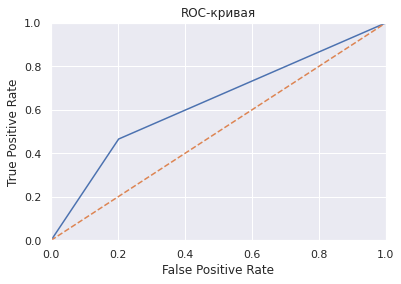

In [89]:
model = DecisionTreeClassifier(random_state=12345, max_depth=1, class_weight='balanced')
model.fit(features_train, target_train)

predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
test_f1_score = f1_score(target_test, predicted_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)

display('Знчения F1-меры на тестовой выборке', test_f1_score)
display('Значение метрики AUC_ROC', auc_roc)

sns.set(font_scale=1)
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

**Исходя из вышеуказанного графика при max_depth=5 и величине порога 0.3, можно сказать, что F1-мера = 0.634, а метрика ROC-AUC = 0.775.**

**Проверим на адекватность нашу модель. Для этого используем фиктивный классификатор DummyClassifier. Он покажет вероятность успеха даже при угадывании. Чтобы признать модель адекватной, нужно, чтобы показатели метрик были выше тех, которые получатся у фиктивного классификатора. Так как от значения параметра strategy может поменяться результат, переберём их  и для сравнения будем учитывать лучший результат.**

In [90]:
names = ['stratified', 'most_frequent', 'prior', 'uniform']
data = []
col = ['name', 'f1_score_test', 'auc_roc_test']
for name in names:
    new_dummy_classifier = DummyClassifier(strategy=name)
    new_dummy_classifier.fit(features_train, target_train)
    test_predictions = new_dummy_classifier.predict(features_test)
    probabilities_test = new_dummy_classifier.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    test_accuracy = accuracy_score(target_test, test_predictions)
    test_f1_score = f1_score(target_test, test_predictions)
    auc_roc_test = roc_auc_score(target_test, probabilities_one_test)
    data.append([name, test_f1_score, auc_roc_test])
table = pd.DataFrame(data=data, columns=col)
display(table[table['f1_score_test']==table['f1_score_test'].max()])

,name,f1_score_test,auc_roc_test
3,uniform,0.439701,0.5


**Из вышеуказанного видно, что при значении показателя strategy=uniform из фиктивных классификаторов намного ниже, чем у нашей модели и находятся на уровне 0.43 для F1-меры, а также 0.5 метрики ROC_AUC. Поэтому, можно сказать, что наша модель пошла проверку на адекватность.**

**Теперь оценим прибыль, которую принесёт модель за год.**

In [91]:
model = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)

**Сохраним данные в таблице hotel_test.**

In [92]:
hotel_test['predictions'] = predicted_test
display(hotel_test.head())

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,predictions
0,6086,1,74,2017,0,1,1,1,0,2,...,0,0,A,0,0,Transient,0,0,1,1
1,6087,1,62,2017,0,1,1,2,2,2,...,0,0,A,0,0,Transient,0,1,4,0
2,6088,1,62,2017,0,1,1,2,2,2,...,0,0,A,0,0,Transient,0,1,4,0
3,6089,1,71,2017,0,1,1,2,2,1,...,0,0,A,0,0,Transient,0,1,4,0
4,6090,1,172,2017,0,1,1,2,5,2,...,0,0,A,0,0,Transient,0,0,7,1


**Теперь на основе функции count_revenue создадим функцию, которая подсчитает прибыль отеля с учётом депозитов.**

In [93]:
#summer = ['June', 'July', 'August']
#winter = ['December', 'January', 'February']

#def count_revenue_with_deposit(row):
#    room_type = row['reserved_room_type']
#    month = row['arrival_date_month']
#    week_nights = row['stays_in_week_nights']
#    weekend_nights = row['stays_in_weekend_nights']
#    price = room_data[room_data['reserved_room_type'] == room_type]['room_price'].median()
#    prepare_cost = room_data[room_data['reserved_room_type'] == room_type]['room_prepare'].median()
#    total_nights = week_nights + weekend_nights
#    if (row['predictions']==1):
#        deposit = 0.8*price
#    else:
#        deposit = 0
        
    
#    if (row['is_canceled'] == 0):
        
#        prepare_nights = math.floor((total_nights-1)/2)
        
        
#        if (month in summer):
#            revenue = 1.4*price*total_nights - prepare_cost - prepare_nights*prepare_cost
            
#        elif (month in winter):
#            revenue = price*total_nights - prepare_cost - prepare_nights*prepare_cost
            
#        else:
#            revenue = 1.2 * price*total_nights - prepare_cost - prepare_nights*prepare_cost
#    else:
#        revenue = deposit - prepare_cost
#    return revenue

In [94]:
def value_replace(data,column,dct,check=True):
    if check:
        print('Before replacement the unique values are:')
        print(data[column].unique())
        print('-'*30)
    data[column] = data[column].replace(to_replace=dct)
    if check:
        print('After replacement the unique values are:')
        print(data[column].unique())

In [95]:
months_dct_train = {'January':0,'February':1,'March':2,'April':3,'May':4,'June':5,'July':6,'August':7,'September':8,'October':9,'November':10,'December':11}

In [96]:
value_replace(data=hotel_test,column='arrival_date_month',dct=months_dct_train)

Before replacement the unique values are:
[0 1 2 3 4 5 6 7]
------------------------------
After replacement the unique values are:
[0 1 2 3 4 5 6 7]


In [97]:
def add_new_columns(data):
    
    data['norm_room_cost'] = np.where(data['reserved_room_type'] == 'G',350,
                                    np.where(data['reserved_room_type'] == 'F',450,
                                    np.where(data['reserved_room_type'] == 'E',500,
                                    np.where(data['reserved_room_type'] == 'D',550,
                                    np.where(data['reserved_room_type'] == 'C',600,
                                    np.where(data['reserved_room_type'] == 'B',800,1000
                                            )
                                            )
                                            )
                                            )
                                            ))
    data['season_room_cost'] = np.where((((data['arrival_date_month'] >= 2) & (data['arrival_date_month']<=4)) |((data['arrival_date_month'] >=8) & (data['arrival_date_month']<=10))),data['norm_room_cost'] * 1.2,np.where(((data['arrival_date_month'] >=5) &(data['arrival_date_month'] <= 7)),data['norm_room_cost'] * 1.4,data['norm_room_cost']))
    data['number_of_cleaning'] = np.where(data['is_canceled'] != 1,2+(data['total_nights'] // 2),0)
    data['room_service_cost'] = np.where(data['reserved_room_type'] == 'G',150,
                                    np.where(data['reserved_room_type'] == 'F',150,
                                    np.where(data['reserved_room_type'] == 'E',150,
                                    np.where(data['reserved_room_type'] == 'D',150,
                                    np.where(data['reserved_room_type'] == 'C',350,
                                    np.where(data['reserved_room_type'] == 'B',350,400

                                            )
                                            )
                                            )
                                            )))

In [98]:
hotel_test.head().T

,0,1,2,3,4
id,6086,6087,6088,6089,6090
is_canceled,1,1,1,1,1
lead_time,74,62,62,71,172
arrival_date_year,2017,2017,2017,2017,2017
arrival_date_month,0,0,0,0,0
arrival_date_week_number,1,1,1,1,1
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,1,2,2,2,2
stays_in_week_nights,0,2,2,2,5
adults,2,2,2,1,2


In [99]:
add_new_columns(hotel_test)

In [100]:
def total_revenue(data):
    data['total_revenue'] = np.where(data['is_canceled'] == 0,((data['season_room_cost'] * data['total_nights']) - (data['room_service_cost'] * data['number_of_cleaning'])),-(data['season_room_cost'] + data['room_service_cost']))

In [101]:
total_revenue(hotel_test)

In [102]:
def total_revenue(data):
        data['total_revenue'] = np.where(data['is_canceled'] == 0,((data['season_room_cost'] * data['total_nights']) - (data['room_service_cost'] * data['number_of_cleaning'])),-(data['season_room_cost'] + data['room_service_cost']))

In [103]:
def profit(data):
    return data['total_revenue'].sum()

In [104]:
model.predict(features_test)

array([1, 0, 0, ..., 1, 0, 1])

In [105]:
hotel_test.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,predictions,norm_room_cost,season_room_cost,number_of_cleaning,room_service_cost,total_revenue
0,6086,1,74,2017,0,1,1,1,0,2,...,Transient,0,0,1,1,1000,1000.0,0,400,-1400.0
1,6087,1,62,2017,0,1,1,2,2,2,...,Transient,0,1,4,0,1000,1000.0,0,400,-1400.0
2,6088,1,62,2017,0,1,1,2,2,2,...,Transient,0,1,4,0,1000,1000.0,0,400,-1400.0
3,6089,1,71,2017,0,1,1,2,2,1,...,Transient,0,1,4,0,1000,1000.0,0,400,-1400.0
4,6090,1,172,2017,0,1,1,2,5,2,...,Transient,0,0,7,1,1000,1000.0,0,400,-1400.0


In [106]:
hotel_test['model_predict'] = model.predict(features_test)

In [107]:
hotel_test['deposit'] = np.where((hotel_test['model_predict'] == 1) & (hotel_test['is_canceled'] ==1),(hotel_test['season_room_cost'] + hotel_test['room_service_cost'])*0.8,0)

In [108]:
hotel_test['is_canceled'].sum()

12372

In [109]:
hotel_test['model_predict'].sum()

13904

In [110]:
hotel_test[(hotel_test['model_predict'] == 1) & (hotel_test['is_canceled'] == 1)]

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,total_nights,predictions,norm_room_cost,season_room_cost,number_of_cleaning,room_service_cost,total_revenue,model_predict,deposit
0,6086,1,74,2017,0,1,1,1,0,2,...,0,1,1,1000,1000.0,0,400,-1400.0,1,1120.0
4,6090,1,172,2017,0,1,1,2,5,2,...,0,7,1,1000,1000.0,0,400,-1400.0,1,1120.0
5,6091,1,52,2017,0,1,1,2,5,1,...,0,7,1,1000,1000.0,0,400,-1400.0,1,1120.0
8,6094,1,89,2017,0,1,2,1,3,2,...,0,4,1,500,500.0,0,150,-650.0,1,520.0
10,6096,1,31,2017,0,1,2,1,4,2,...,0,5,1,350,350.0,0,150,-500.0,1,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22347,87839,1,13,2017,4,22,29,1,2,1,...,0,3,1,1000,1200.0,0,400,-1600.0,1,1280.0
22350,87842,1,13,2017,4,22,29,1,2,1,...,0,3,1,1000,1200.0,0,400,-1600.0,1,1280.0
23163,88655,1,25,2017,4,18,6,2,1,1,...,0,3,1,500,600.0,0,150,-750.0,1,600.0
25548,91040,1,4,2017,5,23,5,1,0,1,...,0,1,1,1000,1400.0,0,400,-1800.0,1,1440.0


In [111]:
def profit_w_model(data):
    return profit(data) + data.query('model_predict == 1 & is_canceled == 1')['deposit'].sum()

In [112]:
profit(hotel_test)

25912100.0

In [113]:
profit_w_model(hotel_test)

35585284.0

In [114]:
#total_revenue_deposit = hotel_test.apply(count_revenue_with_deposit, axis=1).sum()
#print(total_revenue_deposit)

**Теперь посчитаем прибыль отеля после внедрения депозитов с учётом стоимости разработки системы прогнозирования.**

In [115]:
#IMPLEMENTATION_COST = 400000
#new_profit = total_revenue_deposit - total_revenue - IMPLEMENTATION_COST
#print(new_profit)

**С учётом введения стоимости депозитов, отель получит дополнительно почти 5,6 миллионов дополнительных рублей в год.**

**Вывод по Шагу 4:**

* До внедрения системы отель получил 32943580 рублей.
* Лучшая модель - решающее дерево с максимальной глубиной 1.
* Метрики качетва на тестовой выборке: F1-мера = 0.634, а метрика ROC-AUC = 0.775.
* Чистая прибыль после введения депозитов 54576610 рублей.
* Дополнительная прибыль после введения депозитов с учётом стоимости разработки системы прогнозирования 5595080 рублей.

### Шаг 5. Опишите портрет «ненадёжного» клиента

**Проанализируем бронирования, которые модель посчитала отмененными и, которые дейтвительно оказались отменёнными.**

In [116]:
hotel_test.query('is_canceled==1 and predictions==True').describe()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,total_nights,predictions,norm_room_cost,season_room_cost,number_of_cleaning,room_service_cost,total_revenue,model_predict,deposit
count,8328.000000,8328.0,8328.000000,8328.0,8328.000000,8328.000000,8328.000000,8328.000000,8328.000000,8328.000000,...,8328.0,8328.000000,8328.0,8328.000000,8328.000000,8328.0,8328.000000,8328.000000,8328.0,8328.000000
mean,43994.287224,1.0,118.785543,2017.0,3.484630,17.613473,15.656460,0.837536,2.350024,1.878602,...,0.0,3.187560,1.0,899.837896,1103.846061,0.0,348.060759,-1451.906820,1.0,1161.525456
std,15104.615915,0.0,78.165201,0.0,1.933382,8.405157,8.671792,0.854012,1.272082,0.467545,...,0.0,1.557552,0.0,193.853641,265.920281,0.0,101.069804,357.112286,0.0,285.689828
min,6086.000000,1.0,0.000000,2017.0,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.0,1.000000,1.0,350.000000,350.000000,0.0,150.000000,-1800.000000,1.0,400.000000
25%,46178.250000,1.0,56.000000,2017.0,2.000000,11.000000,8.000000,0.000000,1.000000,2.000000,...,0.0,2.000000,1.0,1000.000000,1000.000000,0.0,400.000000,-1600.000000,1.0,1120.000000
50%,49065.000000,1.0,109.000000,2017.0,4.000000,18.000000,15.000000,1.000000,2.000000,2.000000,...,0.0,3.000000,1.0,1000.000000,1200.000000,0.0,400.000000,-1600.000000,1.0,1280.000000
75%,51924.250000,1.0,169.000000,2017.0,5.000000,24.000000,23.000000,2.000000,3.000000,2.000000,...,0.0,4.000000,1.0,1000.000000,1200.000000,0.0,400.000000,-1400.000000,1.0,1280.000000
max,91576.000000,1.0,349.000000,2017.0,7.000000,35.000000,31.000000,4.000000,6.000000,4.000000,...,0.0,10.000000,1.0,1000.000000,1400.000000,0.0,400.000000,-500.000000,1.0,1440.000000


**Исходя из вышеперечисленной таблицы, можно сказать, что ненадёжным клиентом является:**

* Бронирует за 109 дней;
* Бронирует за три ночи;
* Двое взрослых без детей и младенцев;
* Никогда не был клиентом отеля, не отменял и не заказывал номера ранее;
* Клиент без указания специальных отметок;
* Клиент, которому не нужно парковочное места.

In [117]:
hotel_test.query('is_canceled==1 and predictions==True')['customer_type'].value_counts(normalize=True)

Transient          0.916427
Transient-Party    0.078770
Contract           0.004083
Group              0.000720
Name: customer_type, dtype: float64

**В большинстве случаев ненадёжный клиент не связан с договором или заездом с группой.**

In [118]:
hotel_test.query('is_canceled==1 and predictions==True')['meal'].value_counts(normalize=True)

BB    0.826369
SC    0.120917
HB    0.051153
FB    0.001561
Name: meal, dtype: float64

**В 82% выбирают только завтраки, в 12% без опций.**

In [119]:
hotel_test.query('is_canceled==1 and predictions==True')['reserved_room_type'].value_counts(normalize=True)

A    0.786383
D    0.148775
E    0.036143
F    0.012488
G    0.008886
C    0.005163
B    0.002161
Name: reserved_room_type, dtype: float64

**В основном ненадёжные клиенты предпочитают тип номера A (78%)**

In [120]:
hotel_test.query('is_canceled==1 and predictions==True')['distribution_channel'].value_counts(normalize=True)

TA/TO        0.903338
Direct       0.051153
Corporate    0.044188
GDS          0.001321
Name: distribution_channel, dtype: float64

**В 90% - каналом дистрибуции был TA/TO.**

**Вывод по Шагу 5.**

Ненадёжным клиентом является человек по параметрам:
* Бронирует за 109 дней;
* Бронирует за три ночи;
* Двое взрослых без детей и младенцев;
* Никогда не был клиентом отеля, не отменял и не заказывал номера ранее;
* Клиент без указания специальных отметок;
* Клиент, которому не нужно парковочное места;
* В 82% выбирают только завтраки, в 12% без опций;
* предпочитает тип номера A (78%);
* канал дистрибуции был TA/TO.

### Шаг 6. Напишите общий вывод

**В ходе проведения исследования нами были выполнены следующие шаги:**

* Шаг 1. Открыли файл с данными.
* Шаг 2. Провели предоработку и исследовательский анализ данных.
* Шаг 3. Выявили, что прибыль отеля составила 32943580 рублей без депозита на тестовой выборке.
* Шаг 4. Рассчитали, что чистая прибыль после введения депозитов 54576610 рублей, а дополнительная прибыль после введения депозитов с учётом стоимости разработки системы прогнозирования 5595080 рублей.
* Шаг 5. Определили портрет ненадёжного клиента.
* Шаг 6. Написали общий вывод. Лучшая модель - решающее дерево с максимальной глубиной 1 и метрикой качетва на тестовой выборке: F1-мера = 0.634, и метрикой ROC-AUC = 0.775.

Бизнесу можно порекомендовать:
1) Ввести систему депозитов, которая принесёт больший доход.

2) Использовать модель предсказания бронирования, которая принесёт ещё больший доход.

3) Ввести обязательный депозит для клиентов, которые бронируют далеко заранее номера, чтобы отсеять ненадёжных клиентов.